In [1]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv("api_key.env")

C:\Users\louis\Anaconda3\envs\mlenv\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


True

In [2]:
# Retrieve the News API key
api_key = os.getenv("news_api")

In [3]:
# Create the newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Imports
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
get_ipython().run_line_magic("matplotlib", "inline")

In [5]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    
    if score >= 0:  # Positive
        result = 1
    elif score < 0:  # Negative
        result = -1

    return result

# Sentiments of Stocks(TSLA, AAPL, GME, VIAC, BA, BIDU, AMZN, NIO, DISCA, TME), in Date Range (04/03-03/24)

# TSLA

In [7]:
# Fetch news about the TSLA stocks in 2021 in English
TSLA_news_en = newsapi.get_everything(
    q="TSLA",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
TSLA_news_en["totalResults"]

352

In [8]:
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            articles.append({
                "date": date,
                "title": title,
                "description": description,
                "text": text,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [9]:
 # Creating a DataFrame with all the stocks news
TSLA_df = create_df(TSLA_news_en["articles"])
TSLA_df.head()

,date,title,description,text
0,2021-03-25T19:52:24Z,2 reasons why buying a Tesla with bitcoin is a...,Summary List Placement<ul>\n<li>Tesla said ear...,Tesla is now accepting bitcoin as a form of pa...
1,2021-03-24T23:04:36Z,SoftBank is under investigation by the SEC fol...,Summary List PlacementThe Japanese investing c...,"The Japanese investing conglomerate SoftBank, ..."
2,2021-04-03T12:08:00Z,Elon Musk wants Tesla to be big in Texas. That...,Summary List PlacementElon Musk wants Tesla an...,Elon Musk wants Tesla and SpaceX to be big in ...
3,2021-03-26T17:57:49Z,Elon Musk deleted a tweet implying Tesla could...,Summary List PlacementTesla CEO Elon Musk dele...,Tesla CEO Elon Musk deleted a tweet on Friday ...
4,2021-03-31T13:57:00Z,Biden's infrastructure plan is a 'green tidal ...,Summary List PlacementPresident Biden's infras...,Drew Angerer/Getty Images\r\nPresident Biden's...


In [10]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TSLA_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TSLA_sent_df = TSLA_df.join(title_sentiment_df).join(text_sentiment_df)

TSLA_sent_df.head()


,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-25T19:52:24Z,2 reasons why buying a Tesla with bitcoin is a...,Summary List Placement<ul>\n<li>Tesla said ear...,Tesla is now accepting bitcoin as a form of pa...,-0.5423,0.000,0.280,-1,0.6369,0.129,0.000,1
1,2021-03-24T23:04:36Z,SoftBank is under investigation by the SEC fol...,Summary List PlacementThe Japanese investing c...,"The Japanese investing conglomerate SoftBank, ...",-0.2023,0.000,0.107,-1,0.6597,0.192,0.000,1
2,2021-04-03T12:08:00Z,Elon Musk wants Tesla to be big in Texas. That...,Summary List PlacementElon Musk wants Tesla an...,Elon Musk wants Tesla and SpaceX to be big in ...,-0.4767,0.000,0.171,-1,-0.2023,0.000,0.049,-1
3,2021-03-26T17:57:49Z,Elon Musk deleted a tweet implying Tesla could...,Summary List PlacementTesla CEO Elon Musk dele...,Tesla CEO Elon Musk deleted a tweet on Friday ...,0.0000,0.000,0.000,1,0.0000,0.000,0.000,1
4,2021-03-31T13:57:00Z,Biden's infrastructure plan is a 'green tidal ...,Summary List PlacementPresident Biden's infras...,Drew Angerer/Getty Images\r\nPresident Biden's...,0.3400,0.103,0.000,1,0.4019,0.136,0.064,1


<AxesSubplot:title={'center':'TSLA Title and Text Sentiment Comparisson'}>

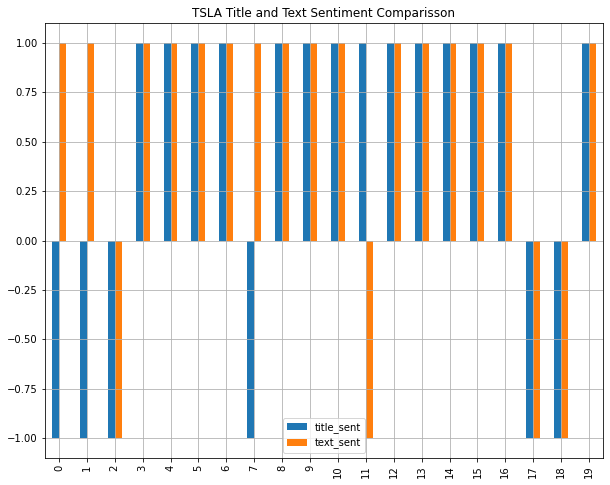

In [11]:
# Analyzing Sentiment Results via Plot
TSLA_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TSLA Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [12]:
TSLA_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.033925,0.08760,0.071450,0.400000,0.174765,0.070000,0.034100,0.600000
std,0.381611,0.11834,0.105228,0.940325,0.396287,0.058751,0.051123,0.820783
min,-0.659700,0.00000,0.000000,-1.000000,-0.636900,0.000000,0.000000,-1.000000
25%,-0.165400,0.00000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.00000,0.000000,1.000000,0.305600,0.074000,0.000000,1.000000
75%,0.323650,0.19600,0.118000,1.000000,0.445000,0.104250,0.052750,1.000000
max,0.585900,0.29700,0.328000,1.000000,0.659700,0.192000,0.172000,1.000000


In [13]:
TSLA_Sentiment_df = TSLA_sent_df[["text", "text_sent"]] 
TSLA_Sentiment_df.head()

,text,text_sent
0,Tesla is now accepting bitcoin as a form of pa...,1
1,"The Japanese investing conglomerate SoftBank, ...",1
2,Elon Musk wants Tesla and SpaceX to be big in ...,-1
3,Tesla CEO Elon Musk deleted a tweet on Friday ...,1
4,Drew Angerer/Getty Images\r\nPresident Biden's...,1


# AAPL

In [14]:
# Fetch news about the AAPL stocks in 2021 in English
AAPL_news_en = newsapi.get_everything(
    q="AAPL",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
AAPL_news_en["totalResults"]

415

In [15]:
 # Creating a DataFrame with all the stocks news
AAPL_df = create_df(AAPL_news_en["articles"])
AAPL_df.head()

,date,title,description,text
0,2021-03-24T23:04:36Z,SoftBank is under investigation by the SEC fol...,Summary List PlacementThe Japanese investing c...,"The Japanese investing conglomerate SoftBank, ..."
1,2021-03-30T14:36:23Z,Apple will host WWDC entirely online for the s...,Summary List PlacementApple will host WWDC ent...,Apple will host WWDC entirely online for the s...
2,2021-03-27T12:21:00Z,Apple will never deliver a car because it can'...,Summary List PlacementThe single biggest probl...,The single biggest problem with the Apple Car ...
3,2021-03-31T18:22:35Z,AAPL stock upgraded at UBS despite lack of iPh...,"Today, Apple was upgraded to a “buy” rating by...","Today, Apple was upgraded to a “buy” rating by..."
4,2021-03-31T14:41:15Z,"UBS upgrades AAPL to 'Buy,' raises price targe...","Investment bank UBS has upgraded AAPL to a ""Bu...","Investment bank UBS has upgraded AAPL to a ""Bu..."


In [16]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AAPL_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AAPL_sent_df = AAPL_df.join(title_sentiment_df).join(text_sentiment_df)

AAPL_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-24T23:04:36Z,SoftBank is under investigation by the SEC fol...,Summary List PlacementThe Japanese investing c...,"The Japanese investing conglomerate SoftBank, ...",-0.2023,0.000,0.107,-1,0.6597,0.192,0.000,1
1,2021-03-30T14:36:23Z,Apple will host WWDC entirely online for the s...,Summary List PlacementApple will host WWDC ent...,Apple will host WWDC entirely online for the s...,0.0000,0.000,0.000,1,0.0000,0.000,0.000,1
2,2021-03-27T12:21:00Z,Apple will never deliver a car because it can'...,Summary List PlacementThe single biggest probl...,The single biggest problem with the Apple Car ...,0.0000,0.000,0.000,1,-0.7256,0.000,0.168,-1
3,2021-03-31T18:22:35Z,AAPL stock upgraded at UBS despite lack of iPh...,"Today, Apple was upgraded to a “buy” rating by...","Today, Apple was upgraded to a “buy” rating by...",0.2411,0.179,0.000,1,0.3400,0.064,0.000,1
4,2021-03-31T14:41:15Z,"UBS upgrades AAPL to 'Buy,' raises price targe...","Investment bank UBS has upgraded AAPL to a ""Bu...","Investment bank UBS has upgraded AAPL to a ""Bu...",0.4215,0.189,0.000,1,0.2960,0.059,0.000,1


<AxesSubplot:title={'center':'AAPL Title and Text Sentiment Comparisson'}>

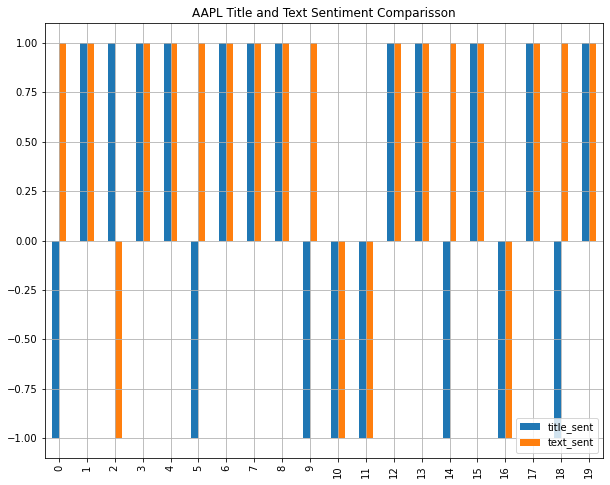

In [17]:
# Analyzing Sentiment Results via Plot
AAPL_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AAPL Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [18]:
AAPL_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.099125,0.052300,0.07790,0.200000,0.237620,0.087450,0.037300,0.600000
std,0.320991,0.076403,0.10303,1.005249,0.429855,0.063343,0.058816,0.820783
min,-0.695600,0.000000,0.00000,-1.000000,-0.725600,0.000000,0.000000,-1.000000
25%,-0.289900,0.000000,0.00000,-1.000000,0.133425,0.056500,0.000000,1.000000
50%,0.000000,0.000000,0.00000,1.000000,0.340000,0.070500,0.000000,1.000000
75%,0.019300,0.114250,0.18225,1.000000,0.557400,0.117750,0.074000,1.000000
max,0.421500,0.189000,0.27000,1.000000,0.810000,0.200000,0.168000,1.000000


In [19]:
AAPL_Sentiment_df = AAPL_sent_df[["text", "text_sent"]] 
AAPL_Sentiment_df.head()

,text,text_sent
0,"The Japanese investing conglomerate SoftBank, ...",1
1,Apple will host WWDC entirely online for the s...,1
2,The single biggest problem with the Apple Car ...,-1
3,"Today, Apple was upgraded to a “buy” rating by...",1
4,"Investment bank UBS has upgraded AAPL to a ""Bu...",1


# GME

In [20]:
# Fetch news about the GME stocks in 2021 in English
GME_news_en = newsapi.get_everything(
    q="GME",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
GME_news_en["totalResults"]

224

In [21]:
 # Creating a DataFrame with all the stocks news
GME_df = create_df(GME_news_en["articles"])
GME_df.head()

,date,title,description,text
0,2021-03-30T14:37:08Z,GameStop just made its third hire from Amazon ...,Summary List PlacementYet another former Amazo...,Yet another former Amazon leader is joining Ga...
1,2021-03-26T17:21:51Z,GameStop is worth $16 and little has changed i...,"GameStop bulls are wearing ""rose-tinted glasse...",GameStop stock is still worth just $16 per sha...
2,2021-03-24T04:00:30Z,GameStop (GME) Q4 2020 Earnings Call Transcript,GME earnings call for the period ending Decemb...,Image source: The Motley Fool.\r\nGameStop (NY...
3,2021-04-01T18:31:00Z,: Reddit trading guru Keith Gill looks to have...,The man known as Roaring Kitty on social media...,"GameStop stock had a wild March, but this kitt..."
4,2021-03-27T07:00:00Z,The GameStop Saga Has Reached A New Chapter,"By Dan Duddy Published: March 27th, 2021",It seems like the story of GameStop's stock is...


In [22]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in GME_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
GME_sent_df = GME_df.join(title_sentiment_df).join(text_sentiment_df)

GME_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-30T14:37:08Z,GameStop just made its third hire from Amazon ...,Summary List PlacementYet another former Amazo...,Yet another former Amazon leader is joining Ga...,0.1779,0.078,0.0,1,0.5106,0.125,0.000,1
1,2021-03-26T17:21:51Z,GameStop is worth $16 and little has changed i...,"GameStop bulls are wearing ""rose-tinted glasse...",GameStop stock is still worth just $16 per sha...,0.2263,0.128,0.0,1,0.4767,0.108,0.000,1
2,2021-03-24T04:00:30Z,GameStop (GME) Q4 2020 Earnings Call Transcript,GME earnings call for the period ending Decemb...,Image source: The Motley Fool.\r\nGameStop (NY...,0.0000,0.000,0.0,1,-0.4404,0.000,0.116,-1
3,2021-04-01T18:31:00Z,: Reddit trading guru Keith Gill looks to have...,The man known as Roaring Kitty on social media...,"GameStop stock had a wild March, but this kitt...",0.0000,0.000,0.0,1,0.0000,0.000,0.000,1
4,2021-03-27T07:00:00Z,The GameStop Saga Has Reached A New Chapter,"By Dan Duddy Published: March 27th, 2021",It seems like the story of GameStop's stock is...,0.1027,0.189,0.0,1,0.6124,0.114,0.000,1


<AxesSubplot:title={'center':'GME Title and Text Sentiment Comparisson'}>

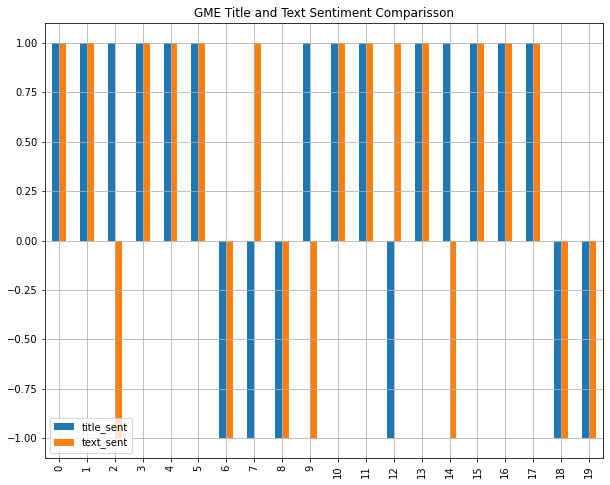

In [23]:
# Analyzing Sentiment Results via Plot
GME_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="GME Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [24]:
GME_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,-0.056955,0.051850,0.070600,0.400000,0.157980,0.067850,0.02915,0.300000
std,0.303354,0.076722,0.116698,0.940325,0.391772,0.071296,0.04070,0.978721
min,-0.624900,0.000000,0.000000,-1.000000,-0.510600,0.000000,0.00000,-1.000000
25%,-0.133600,0.000000,0.000000,-1.000000,-0.057625,0.000000,0.00000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.101150,0.062000,0.00000,1.000000
75%,0.115300,0.123500,0.123000,1.000000,0.485175,0.109500,0.06000,1.000000
max,0.421500,0.206000,0.412000,1.000000,0.817600,0.259000,0.11600,1.000000


In [25]:
GME_Sentiment_df = GME_sent_df[["text", "text_sent"]] 
GME_Sentiment_df.head()

,text,text_sent
0,Yet another former Amazon leader is joining Ga...,1
1,GameStop stock is still worth just $16 per sha...,1
2,Image source: The Motley Fool.\r\nGameStop (NY...,-1
3,"GameStop stock had a wild March, but this kitt...",1
4,It seems like the story of GameStop's stock is...,1


# VIAC

In [26]:
# Fetch news about the VIAC stocks in 2021 in English
VIAC_news_en = newsapi.get_everything(
    q="VIAC",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
VIAC_news_en["totalResults"]

144

In [27]:
 # Creating a DataFrame with all the stocks news
VIAC_df = create_df(VIAC_news_en["articles"])
VIAC_df.head()

,date,title,description,text
0,2021-03-29T00:40:00Z,The Wall Street Journal: Ex-Tiger Asia manager...,"The liquidations appear to have left Archegos,...",One mystery in a dramatic year on Wall Street ...
1,2021-03-30T13:07:00Z,Metals Stocks: Gold prices tumble 2% as 10-yea...,Gold futures are hit Tuesday by rising bond yi...,Gold futures were hit Tuesday by rising bond y...
2,2021-03-28T22:27:00Z,Market Extra: Stock-market traders fixated on ...,Despite the upbeat note that the final full we...,"Stocks finished firmly higher Friday, capping ..."
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...
4,2021-03-29T19:01:00Z,"Jim Cramer: The Game Isn't Rigged, There's No ...",Stay focused and look for opportunity....VIAC,"See, it was rigged all along. If that's your a..."


In [28]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in VIAC_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
VIAC_sent_df = VIAC_df.join(title_sentiment_df).join(text_sentiment_df)

VIAC_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-29T00:40:00Z,The Wall Street Journal: Ex-Tiger Asia manager...,"The liquidations appear to have left Archegos,...",One mystery in a dramatic year on Wall Street ...,0.0000,0.000,0.000,1,0.2960,0.068,0.000,1
1,2021-03-30T13:07:00Z,Metals Stocks: Gold prices tumble 2% as 10-yea...,Gold futures are hit Tuesday by rising bond yi...,Gold futures were hit Tuesday by rising bond y...,0.2023,0.114,0.000,1,0.0000,0.000,0.000,1
2,2021-03-28T22:27:00Z,Market Extra: Stock-market traders fixated on ...,Despite the upbeat note that the final full we...,"Stocks finished firmly higher Friday, capping ...",0.0000,0.000,0.000,1,0.3400,0.070,0.000,1
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...,-0.3818,0.096,0.216,-1,0.6486,0.200,0.066,1
4,2021-03-29T19:01:00Z,"Jim Cramer: The Game Isn't Rigged, There's No ...",Stay focused and look for opportunity....VIAC,"See, it was rigged all along. If that's your a...",-0.1032,0.278,0.236,-1,-0.6486,0.000,0.142,-1


<AxesSubplot:title={'center':'VIAC Title and Text Sentiment Comparisson'}>

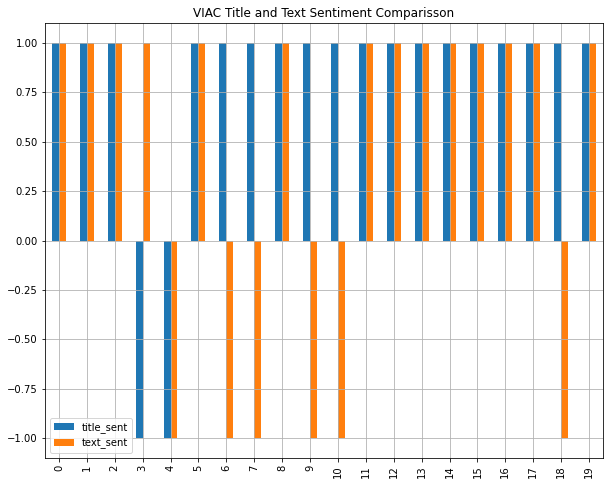

In [29]:
# Analyzing Sentiment Results via Plot
VIAC_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="VIAC Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [30]:
VIAC_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.074030,0.070700,0.027250,0.800000,0.086680,0.077150,0.050800,0.400000
std,0.261971,0.136898,0.071137,0.615587,0.472177,0.074296,0.068591,0.940325
min,-0.381800,0.000000,0.000000,-1.000000,-0.757900,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,-0.139525,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.066000,0.000000,1.000000
75%,0.000000,0.100500,0.000000,1.000000,0.440775,0.144500,0.111750,1.000000
max,0.822500,0.518000,0.236000,1.000000,0.757900,0.231000,0.178000,1.000000


In [31]:
VIAC_Sentiment_df = VIAC_sent_df[["text", "text_sent"]] 
VIAC_Sentiment_df.head()

,text,text_sent
0,One mystery in a dramatic year on Wall Street ...,1
1,Gold futures were hit Tuesday by rising bond y...,1
2,"Stocks finished firmly higher Friday, capping ...",1
3,ViacomCBS Inc. shares are on track to snap a f...,1
4,"See, it was rigged all along. If that's your a...",-1


# BA

In [32]:
# Fetch news about the BA stocks in 2021 in English
BA_news_en = newsapi.get_everything(
    q="BA",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
BA_news_en["totalResults"]

654

In [33]:
 # Creating a DataFrame with all the stocks news
BA_df = create_df(BA_news_en["articles"])
BA_df.head()

,date,title,description,text
0,2021-03-24T10:22:00Z,Breakingviews - Capital Calls - BA owner reach...,Breakingviews - Capital Calls - BA owner reach...,By Reuters Staff\r\nBritish Airways Airbus A38...
1,2021-03-25T10:06:00Z,Senegalese artist Omar Ba tackles politics and...,When Senegal erupted in violent protests this ...,DAKAR (Reuters) - When Senegal erupted in viol...
2,2021-03-25T10:23:00Z,Senegalese artist Omar Ba tackles politics and...,When Senegal erupted in violent protests this ...,DAKAR (Reuters) - When Senegal erupted in viol...
3,2021-03-26T01:43:01Z,There's a massive ship stuck in the Suez Canal...,The massive container ship lodged in the Suez ...,The massive container ship lodged in the Suez ...
4,2021-03-30T06:03:00Z,"Dr. Q, the farmer who became one of the best n...",In recent days Brad Pitt announced that he wil...,"March\r\n30, 2021\r\n6 min read\r\nThis articl..."


In [34]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in BA_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
BA_sent_df = BA_df.join(title_sentiment_df).join(text_sentiment_df)

BA_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-24T10:22:00Z,Breakingviews - Capital Calls - BA owner reach...,Breakingviews - Capital Calls - BA owner reach...,By Reuters Staff\r\nBritish Airways Airbus A38...,0.0516,0.118,0.000,1,0.0000,0.0,0.000,1
1,2021-03-25T10:06:00Z,Senegalese artist Omar Ba tackles politics and...,When Senegal erupted in violent protests this ...,DAKAR (Reuters) - When Senegal erupted in viol...,0.0000,0.000,0.000,1,-0.8591,0.0,0.229,-1
2,2021-03-25T10:23:00Z,Senegalese artist Omar Ba tackles politics and...,When Senegal erupted in violent protests this ...,DAKAR (Reuters) - When Senegal erupted in viol...,0.0000,0.000,0.000,1,-0.8591,0.0,0.241,-1
3,2021-03-26T01:43:01Z,There's a massive ship stuck in the Suez Canal...,The massive container ship lodged in the Suez ...,The massive container ship lodged in the Suez ...,-0.1280,0.000,0.103,-1,0.0000,0.0,0.000,1
4,2021-03-30T06:03:00Z,"Dr. Q, the farmer who became one of the best n...",In recent days Brad Pitt announced that he wil...,"March\r\n30, 2021\r\n6 min read\r\nThis articl...",0.6369,0.244,0.000,1,-0.3400,0.0,0.072,-1


<AxesSubplot:title={'center':'BA Title and Text Sentiment Comparisson'}>

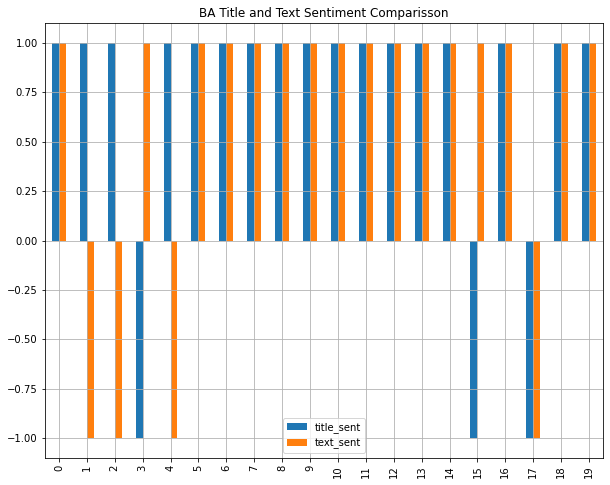

In [35]:
# Analyzing Sentiment Results via Plot
BA_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="BA Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [36]:
BA_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.031950,0.028850,0.020550,0.700000,0.110375,0.058800,0.039150,0.600000
std,0.222905,0.073642,0.054011,0.732695,0.481807,0.074618,0.075233,0.820783
min,-0.273200,0.000000,0.000000,-1.000000,-0.859100,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.050500,0.031000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,0.475775,0.091750,0.057250,1.000000
max,0.636900,0.244000,0.208000,1.000000,0.827100,0.237000,0.241000,1.000000


In [37]:
BA_Sentiment_df = BA_sent_df[["text", "text_sent"]] 
BA_Sentiment_df.head()

,text,text_sent
0,By Reuters Staff\r\nBritish Airways Airbus A38...,1
1,DAKAR (Reuters) - When Senegal erupted in viol...,-1
2,DAKAR (Reuters) - When Senegal erupted in viol...,-1
3,The massive container ship lodged in the Suez ...,1
4,"March\r\n30, 2021\r\n6 min read\r\nThis articl...",-1


# BIDU

In [38]:
# Fetch news about the BIDU stocks in 2021 in English
BIDU_news_en = newsapi.get_everything(
    q="BIDU",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
BIDU_news_en["totalResults"]

107

In [39]:
 # Creating a DataFrame with all the stocks news
BIDU_df = create_df(BIDU_news_en["articles"])
BIDU_df.head()

,date,title,description,text
0,2021-03-29T13:50:00Z,Archegos margin call share dump ripples across...,Nomura and Credit Suisse are facing billions o...,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...
1,2021-03-29T11:07:07Z,Chinese Tech Stocks Sell Off after 'Missed' Ar...,"Nomura, Credit Suisse warn profits will take a...",Chinese tech stocks sold off on Monday due to ...
2,2021-03-25T10:07:00Z,More pressure for Chinese tech stocks as SEC r...,Dual-listed Chinese companies are extending lo...,<ul><li>Dual-listed Chinese companies are exte...
3,2021-03-26T20:53:43Z,"5 Top Stock Trades for Monday: ARKK, SKLZ, FUB...",It’s been a weird and choppy week. FAANG stock...,Despite some warning signs that the market may...
4,2021-03-26T16:50:58Z,"Delisting Chinese Stocks? Why BIDU, VIPS and T...",Chinese stocks are falling hard on Friday on f...,(Bloomberg) -- A global semiconductor shortage...


In [40]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in BIDU_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
BIDU_sent_df = BIDU_df.join(title_sentiment_df).join(text_sentiment_df)

BIDU_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-29T13:50:00Z,Archegos margin call share dump ripples across...,Nomura and Credit Suisse are facing billions o...,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...,-0.1027,0.186,0.220,-1,-0.0258,0.070,0.072,-1
1,2021-03-29T11:07:07Z,Chinese Tech Stocks Sell Off after 'Missed' Ar...,"Nomura, Credit Suisse warn profits will take a...",Chinese tech stocks sold off on Monday due to ...,0.0000,0.000,0.000,1,-0.4404,0.000,0.083,-1
2,2021-03-25T10:07:00Z,More pressure for Chinese tech stocks as SEC r...,Dual-listed Chinese companies are extending lo...,<ul><li>Dual-listed Chinese companies are exte...,-0.3597,0.000,0.161,-1,-0.1280,0.074,0.090,-1
3,2021-03-26T20:53:43Z,"5 Top Stock Trades for Monday: ARKK, SKLZ, FUB...",It’s been a weird and choppy week. FAANG stock...,Despite some warning signs that the market may...,0.2023,0.167,0.000,1,0.3200,0.125,0.066,1
4,2021-03-26T16:50:58Z,"Delisting Chinese Stocks? Why BIDU, VIPS and T...",Chinese stocks are falling hard on Friday on f...,(Bloomberg) -- A global semiconductor shortage...,0.0000,0.000,0.000,1,-0.5267,0.000,0.132,-1


<AxesSubplot:title={'center':'BIDU Title and Text Sentiment Comparisson'}>

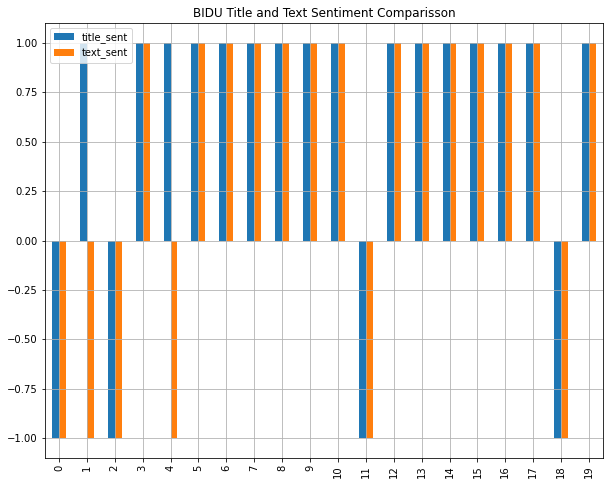

In [41]:
# Analyzing Sentiment Results via Plot
BIDU_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="BIDU Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [42]:
BIDU_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.040045,0.072050,0.049900,0.600000,0.060980,0.046200,0.031300,0.400000
std,0.247803,0.093487,0.094942,0.820783,0.320288,0.052396,0.045369,0.940325
min,-0.493900,0.000000,0.000000,-1.000000,-0.526700,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,-0.051350,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.027500,0.000000,1.000000
75%,0.208300,0.161750,0.029500,1.000000,0.284900,0.074250,0.074750,1.000000
max,0.381800,0.245000,0.314000,1.000000,0.680800,0.139000,0.132000,1.000000


In [43]:
BIDU_Sentiment_df = BIDU_sent_df[["text", "text_sent"]] 
BIDU_Sentiment_df.head()

,text,text_sent
0,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...,-1
1,Chinese tech stocks sold off on Monday due to ...,-1
2,<ul><li>Dual-listed Chinese companies are exte...,-1
3,Despite some warning signs that the market may...,1
4,(Bloomberg) -- A global semiconductor shortage...,-1


# AMZN

In [44]:
# Fetch news about the AMZN stocks in 2021 in English
AMZN_news_en = newsapi.get_everything(
    q="AMZN",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
AMZN_news_en["totalResults"]

521

In [45]:
 # Creating a DataFrame with all the stocks news
AMZN_df = create_df(AMZN_news_en["articles"])
AMZN_df.head()

,date,title,description,text
0,2021-03-31T18:25:26Z,Amazon says its 'office-centric' model is here...,Summary List PlacementAmazon plans start bring...,Amazon plans start bringing employees back to ...
1,2021-03-27T12:40:00Z,The new CEO of Amazon's $51 billion cloud busi...,"Summary List PlacementBy all accounts, Adam Se...","By all accounts, Adam Selipsky is going to inh..."
2,2021-03-29T05:00:00Z,Do Kohl’s Shares Have More Room to Run?,Kohl’s (NYSE: KSS) shares languished for much ...,This story originally appeared on MarketBeatKo...
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...
4,2021-03-31T22:00:00Z,: Google settles with labor board in win for n...,Alphabet must let workers at data center in So...,Google must allow workers at one of its data c...


In [46]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AMZN_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AMZN_sent_df = AMZN_df.join(title_sentiment_df).join(text_sentiment_df)

AMZN_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-31T18:25:26Z,Amazon says its 'office-centric' model is here...,Summary List PlacementAmazon plans start bring...,Amazon plans start bringing employees back to ...,0.1779,0.082,0.000,1,0.3400,0.091,0.000,1
1,2021-03-27T12:40:00Z,The new CEO of Amazon's $51 billion cloud busi...,"Summary List PlacementBy all accounts, Adam Se...","By all accounts, Adam Selipsky is going to inh...",0.0762,0.061,0.000,1,0.1779,0.044,0.000,1
2,2021-03-29T05:00:00Z,Do Kohl’s Shares Have More Room to Run?,Kohl’s (NYSE: KSS) shares languished for much ...,This story originally appeared on MarketBeatKo...,0.2960,0.239,0.000,1,0.2960,0.073,0.000,1
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...,-0.3818,0.096,0.216,-1,0.6486,0.200,0.066,1
4,2021-03-31T22:00:00Z,: Google settles with labor board in win for n...,Alphabet must let workers at data center in So...,Google must allow workers at one of its data c...,0.5859,0.297,0.000,1,0.2263,0.085,0.036,1


<AxesSubplot:title={'center':'AMZN Title and Text Sentiment Comparisson'}>

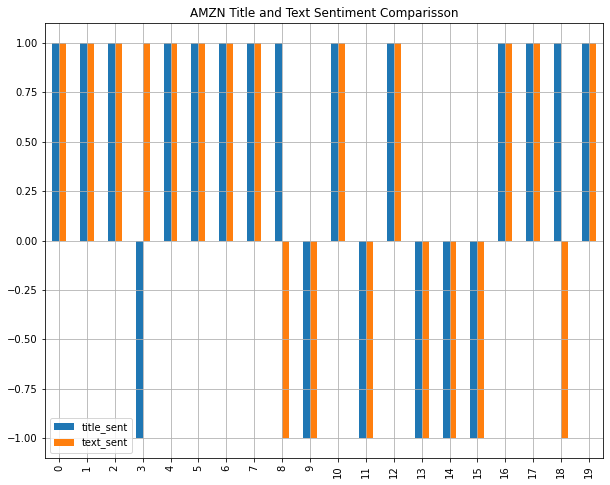

In [47]:
# Analyzing Sentiment Results via Plot
AMZN_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AMZN Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [48]:
AMZN_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.016150,0.090050,0.066150,0.400000,0.083895,0.063250,0.046500,0.300000
std,0.348166,0.099964,0.097761,0.940325,0.419261,0.057807,0.070298,0.978721
min,-0.694600,0.000000,0.000000,-1.000000,-0.840200,0.000000,0.000000,-1.000000
25%,-0.156575,0.000000,0.000000,-1.000000,-0.144050,0.000000,0.000000,-1.000000
50%,0.000000,0.071500,0.000000,1.000000,0.101850,0.068500,0.000000,1.000000
75%,0.207425,0.143250,0.148250,1.000000,0.355475,0.086500,0.066000,1.000000
max,0.585900,0.297000,0.269000,1.000000,0.717800,0.200000,0.256000,1.000000


In [49]:
AMZN_Sentiment_df = AMZN_sent_df[["text", "text_sent"]] 
AMZN_Sentiment_df.head()

,text,text_sent
0,Amazon plans start bringing employees back to ...,1
1,"By all accounts, Adam Selipsky is going to inh...",1
2,This story originally appeared on MarketBeatKo...,1
3,ViacomCBS Inc. shares are on track to snap a f...,1
4,Google must allow workers at one of its data c...,1


# NIO

In [50]:
# Fetch news about the NIO stocks in 2021 in English
NIO_news_en = newsapi.get_everything(
    q="NIO",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
NIO_news_en["totalResults"]

356

In [51]:
 # Creating a DataFrame with all the stocks news
NIO_df = create_df(NIO_news_en["articles"])
NIO_df.head()

,date,title,description,text
0,2021-03-26T11:30:00Z,Electric Car Company Nio Shuts Down Temporaril...,China’s electric car startup Nio will shut dow...,Chinas electric car startup Nio will shut down...
1,2021-03-26T08:42:55Z,Nio to temporarily suspend production due to c...,Chinese electric vehicle (EV) maker Nio Inc sa...,By Reuters Staff\r\nMarch 26 (Reuters) - Chine...
2,2021-03-24T03:16:38Z,China's biggest car brand launches rival to Tesla,Geely's new premium electric car brand Zeekr c...,image copyrightGetty Images\r\nimage captionTh...
3,2021-03-26T20:35:52Z,US STOCKS-Wall Street rallies on strong recove...,"* Indexes rally: Dow 1.39%, S&P 1.66%, Nasdaq ...",* Rotation into value stocks lifts S&amp;P 500...
4,2021-03-26T11:13:14Z,"US STOCKS-Futures rise as bank, energy stocks ...",U.S. stock index futures edged higher on Frida...,FILE PHOTO: The hand of a sculpture of former ...


In [52]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in NIO_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
NIO_sent_df = NIO_df.join(title_sentiment_df).join(text_sentiment_df)

NIO_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-26T11:30:00Z,Electric Car Company Nio Shuts Down Temporaril...,China’s electric car startup Nio will shut dow...,Chinas electric car startup Nio will shut down...,-0.2500,0.000,0.143,-1,-0.2500,0.000,0.054,-1
1,2021-03-26T08:42:55Z,Nio to temporarily suspend production due to c...,Chinese electric vehicle (EV) maker Nio Inc sa...,By Reuters Staff\r\nMarch 26 (Reuters) - Chine...,-0.5106,0.000,0.350,-1,-0.2500,0.000,0.056,-1
2,2021-03-24T03:16:38Z,China's biggest car brand launches rival to Tesla,Geely's new premium electric car brand Zeekr c...,image copyrightGetty Images\r\nimage captionTh...,0.0000,0.000,0.000,1,0.2263,0.086,0.058,1
3,2021-03-26T20:35:52Z,US STOCKS-Wall Street rallies on strong recove...,"* Indexes rally: Dow 1.39%, S&P 1.66%, Nasdaq ...",* Rotation into value stocks lifts S&amp;P 500...,0.7269,0.466,0.000,1,0.6249,0.150,0.000,1
4,2021-03-26T11:13:14Z,"US STOCKS-Futures rise as bank, energy stocks ...",U.S. stock index futures edged higher on Frida...,FILE PHOTO: The hand of a sculpture of former ...,0.8074,0.480,0.000,1,0.4939,0.084,0.000,1


<AxesSubplot:title={'center':'NIO Title and Text Sentiment Comparisson'}>

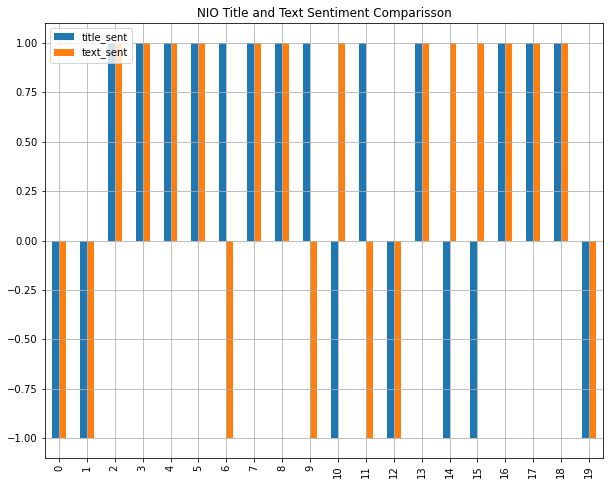

In [53]:
# Analyzing Sentiment Results via Plot
NIO_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="NIO Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [54]:
NIO_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.018320,0.090750,0.069450,0.300000,0.065780,0.068250,0.057550,0.300000
std,0.385868,0.155519,0.108108,0.978721,0.482691,0.069132,0.073037,0.978721
min,-0.695600,0.000000,0.000000,-1.000000,-0.859100,0.000000,0.000000,-1.000000
25%,-0.250000,0.000000,0.000000,-1.000000,-0.250000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.115350,0.071500,0.052500,1.000000
75%,0.090300,0.150500,0.153500,1.000000,0.394375,0.107000,0.065500,1.000000
max,0.807400,0.480000,0.350000,1.000000,0.796400,0.231000,0.247000,1.000000


In [55]:
NIO_Sentiment_df = NIO_sent_df[["text", "text_sent"]] 
NIO_Sentiment_df.head()

,text,text_sent
0,Chinas electric car startup Nio will shut down...,-1
1,By Reuters Staff\r\nMarch 26 (Reuters) - Chine...,-1
2,image copyrightGetty Images\r\nimage captionTh...,1
3,* Rotation into value stocks lifts S&amp;P 500...,1
4,FILE PHOTO: The hand of a sculpture of former ...,1


# DISCA

In [56]:
# Fetch news about the DISCA stocks in 2021 in English
DISCA_news_en = newsapi.get_everything(
    q="DISCA",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
DISCA_news_en["totalResults"]

84

In [57]:
 # Creating a DataFrame with all the stocks news
DISCA_df = create_df(DISCA_news_en["articles"])
DISCA_df.head()

,date,title,description,text
0,2021-03-29T00:40:00Z,The Wall Street Journal: Ex-Tiger Asia manager...,"The liquidations appear to have left Archegos,...",One mystery in a dramatic year on Wall Street ...
1,2021-03-30T13:07:00Z,Metals Stocks: Gold prices tumble 2% as 10-yea...,Gold futures are hit Tuesday by rising bond yi...,Gold futures were hit Tuesday by rising bond y...
2,2021-03-28T22:27:00Z,Market Extra: Stock-market traders fixated on ...,Despite the upbeat note that the final full we...,"Stocks finished firmly higher Friday, capping ..."
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...
4,2021-03-30T16:55:00Z,: ‘This has to be one of the single greatest l...,Wall Street on Tuesday may be seeing muted act...,Wall Street on Tuesday may be seeing muted act...


In [58]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in DISCA_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
DISCA_sent_df = DISCA_df.join(title_sentiment_df).join(text_sentiment_df)

DISCA_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-29T00:40:00Z,The Wall Street Journal: Ex-Tiger Asia manager...,"The liquidations appear to have left Archegos,...",One mystery in a dramatic year on Wall Street ...,0.0000,0.000,0.000,1,0.2960,0.068,0.000,1
1,2021-03-30T13:07:00Z,Metals Stocks: Gold prices tumble 2% as 10-yea...,Gold futures are hit Tuesday by rising bond yi...,Gold futures were hit Tuesday by rising bond y...,0.2023,0.114,0.000,1,0.0000,0.000,0.000,1
2,2021-03-28T22:27:00Z,Market Extra: Stock-market traders fixated on ...,Despite the upbeat note that the final full we...,"Stocks finished firmly higher Friday, capping ...",0.0000,0.000,0.000,1,0.3400,0.070,0.000,1
3,2021-03-30T16:48:00Z,The Ratings Game: Viacom stock on track to sna...,"G.research analyst upgrades Viacom stock, sees...",ViacomCBS Inc. shares are on track to snap a f...,-0.3818,0.096,0.216,-1,0.6486,0.200,0.066,1
4,2021-03-30T16:55:00Z,: ‘This has to be one of the single greatest l...,Wall Street on Tuesday may be seeing muted act...,Wall Street on Tuesday may be seeing muted act...,0.6908,0.254,0.093,1,0.0000,0.000,0.000,1


<AxesSubplot:title={'center':'DISCA Title and Text Sentiment Comparisson'}>

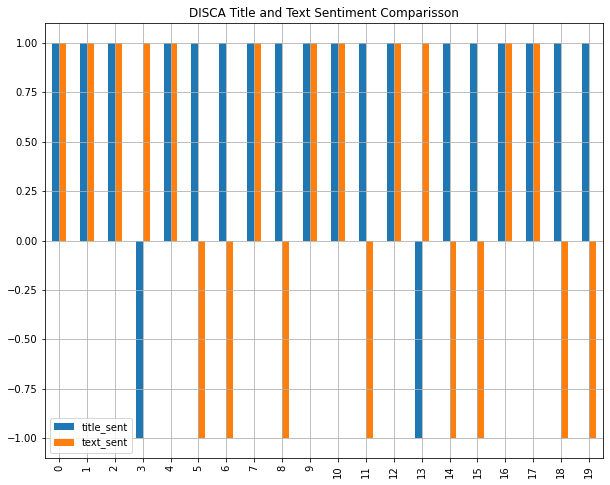

In [59]:
# Analyzing Sentiment Results via Plot
DISCA_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="DISCA Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [60]:
DISCA_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.056295,0.076400,0.037950,0.800000,-0.000510,0.059100,0.059900,0.200000
std,0.241098,0.106049,0.109785,0.615587,0.468617,0.066474,0.079784,1.005249
min,-0.440400,0.000000,0.000000,-1.000000,-0.778300,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,-0.219475,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.056000,0.000000,1.000000
75%,0.165400,0.157250,0.000000,1.000000,0.340000,0.088000,0.136500,1.000000
max,0.690800,0.310000,0.450000,1.000000,0.648600,0.200000,0.217000,1.000000


In [61]:
DISCA_Sentiment_df = DISCA_sent_df[["text", "text_sent"]] 
DISCA_Sentiment_df.head()

,text,text_sent
0,One mystery in a dramatic year on Wall Street ...,1
1,Gold futures were hit Tuesday by rising bond y...,1
2,"Stocks finished firmly higher Friday, capping ...",1
3,ViacomCBS Inc. shares are on track to snap a f...,1
4,Wall Street on Tuesday may be seeing muted act...,1


# TME

In [62]:
# Fetch news about the TME stocks in 2021 in English
TME_news_en = newsapi.get_everything(
    q="TME",
    from_param='2021-03-24',
    to='2021-04-03',
    language="en"
)

# Show the total number of news
TME_news_en["totalResults"]

104

In [63]:
 # Creating a DataFrame with all the stocks news
TME_df = create_df(TME_news_en["articles"])
TME_df.head()

,date,title,description,text
0,2021-03-29T03:07:00Z,: Tencent Music announces $1 billion share-buy...,The move comes days after the U.S. Securities ...,Tencent Music Entertainment Group announced Su...
1,2021-03-29T13:50:00Z,Archegos margin call share dump ripples across...,Nomura and Credit Suisse are facing billions o...,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...
2,2021-04-03T11:38:40Z,Tencent Music: The Ultimate Winner Of China's ...,Tencent Music’s stock is expensive but justifi...,Photo by Spencer Platt/Getty Images News via G...
3,2021-03-26T16:50:58Z,"Delisting Chinese Stocks? Why BIDU, VIPS and T...",Chinese stocks are falling hard on Friday on f...,(Bloomberg) -- A global semiconductor shortage...
4,2021-04-01T16:43:37Z,Should You Invest in Tencent Music Entertainme...,"Harding Loevner, an investment management firm...","He had just finished grocery shopping, but a N..."


In [64]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TME_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TME_sent_df = TME_df.join(title_sentiment_df).join(text_sentiment_df)

TME_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-29T03:07:00Z,: Tencent Music announces $1 billion share-buy...,The move comes days after the U.S. Securities ...,Tencent Music Entertainment Group announced Su...,0.0000,0.000,0.00,1,0.4215,0.085,0.000,1
1,2021-03-29T13:50:00Z,Archegos margin call share dump ripples across...,Nomura and Credit Suisse are facing billions o...,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...,-0.1027,0.186,0.22,-1,-0.0258,0.070,0.072,-1
2,2021-04-03T11:38:40Z,Tencent Music: The Ultimate Winner Of China's ...,Tencent Music’s stock is expensive but justifi...,Photo by Spencer Platt/Getty Images News via G...,0.5859,0.297,0.00,1,0.7096,0.204,0.000,1
3,2021-03-26T16:50:58Z,"Delisting Chinese Stocks? Why BIDU, VIPS and T...",Chinese stocks are falling hard on Friday on f...,(Bloomberg) -- A global semiconductor shortage...,0.0000,0.000,0.00,1,-0.5267,0.000,0.132,-1
4,2021-04-01T16:43:37Z,Should You Invest in Tencent Music Entertainme...,"Harding Loevner, an investment management firm...","He had just finished grocery shopping, but a N...",0.4215,0.286,0.00,1,0.0000,0.000,0.000,1


<AxesSubplot:title={'center':'TME Title and Text Sentiment Comparisson'}>

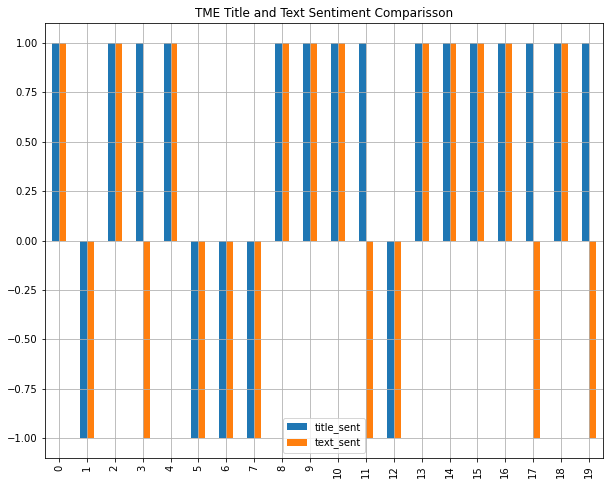

In [65]:
# Analyzing Sentiment Results via Plot
TME_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TME Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [66]:
TME_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.015375,0.092600,0.075150,0.500000,-0.079685,0.071100,0.099300,0.100000
std,0.424621,0.142032,0.145467,0.888523,0.625622,0.102538,0.120982,1.020836
min,-0.659700,0.000000,0.000000,-1.000000,-0.909300,0.000000,0.000000,-1.000000
25%,-0.025675,0.000000,0.000000,0.500000,-0.689350,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.026500,0.073500,1.000000
75%,0.340000,0.188000,0.055000,1.000000,0.421500,0.083500,0.146750,1.000000
max,0.680800,0.412000,0.524000,1.000000,0.964600,0.367000,0.333000,1.000000


In [67]:
TME_Sentiment_df = TME_sent_df[["text", "text_sent"]] 
TME_Sentiment_df.head()

,text,text_sent
0,Tencent Music Entertainment Group announced Su...,1
1,By Reuters Staff\r\nNEW YORK (Reuters) - Nomur...,-1
2,Photo by Spencer Platt/Getty Images News via G...,1
3,(Bloomberg) -- A global semiconductor shortage...,-1
4,"He had just finished grocery shopping, but a N...",1


# Sentiments of Stocks(TSLA, AAPL, FB, UPST, AMZN, GME, TKAT, LIFE, PLUG, BOX), in Date Range (03/23-03/15)

# TSLA

In [68]:
# Fetch news about the TSLA stocks in 2021 in English
TSLA_2_news_en = newsapi.get_everything(
    q="TSLA",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
TSLA_2_news_en["totalResults"]

310

In [69]:
 # Creating a DataFrame with all the stocks news
TSLA_2_df = create_df(TSLA_2_news_en["articles"])
TSLA_2_df.head()

,date,title,description,text
0,2021-03-23T16:33:18Z,The US consumer safety regulator is investigat...,Summary List PlacementThe US Consumer Product ...,The US Consumer Product Safety Commission is l...
1,2021-03-17T13:27:02Z,Elon Musk reverses course on selling NFT song ...,<ol><li>Elon Musk reverses course on selling N...,Billionaire Elon Musk reversed course on Tuesd...
2,2021-03-22T14:33:40Z,A rare photo shows Elon Musk and Jeff Bezos ha...,Summary List PlacementA rare photo has surface...,A rare photo has surfaced of a fateful meeting...
3,2021-03-20T11:04:00Z,'Technoking' and 'Master of Coin' — Elon Musk'...,Summary List PlacementMarketing is one of the ...,Marketing is one of the most expensive things ...
4,2021-03-15T19:07:36Z,Is Volkswagen a Good Electric Vehicle Stock to...,The company's active interest in the electric ...,"March\r\n15, 2021\r\n4 min read\r\nThis story ..."


In [70]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TSLA_2_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TSLA_2_sent_df = TSLA_2_df.join(title_sentiment_df).join(text_sentiment_df)

TSLA_2_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-23T16:33:18Z,The US consumer safety regulator is investigat...,Summary List PlacementThe US Consumer Product ...,The US Consumer Product Safety Commission is l...,0.5423,0.220,0.000,1,0.6486,0.181,0.070,1
1,2021-03-17T13:27:02Z,Elon Musk reverses course on selling NFT song ...,<ol><li>Elon Musk reverses course on selling N...,Billionaire Elon Musk reversed course on Tuesd...,0.0000,0.000,0.000,1,0.0000,0.000,0.000,1
2,2021-03-22T14:33:40Z,A rare photo shows Elon Musk and Jeff Bezos ha...,Summary List PlacementA rare photo has surface...,A rare photo has surfaced of a fateful meeting...,-0.3400,0.000,0.112,-1,0.0000,0.000,0.000,1
3,2021-03-20T11:04:00Z,'Technoking' and 'Master of Coin' — Elon Musk'...,Summary List PlacementMarketing is one of the ...,Marketing is one of the most expensive things ...,0.0762,0.056,0.000,1,-0.2500,0.000,0.057,-1
4,2021-03-15T19:07:36Z,Is Volkswagen a Good Electric Vehicle Stock to...,The company's active interest in the electric ...,"March\r\n15, 2021\r\n4 min read\r\nThis story ...",0.4404,0.293,0.000,1,0.5859,0.134,0.000,1


<AxesSubplot:title={'center':'TSLA Title and Text Sentiment Comparisson'}>

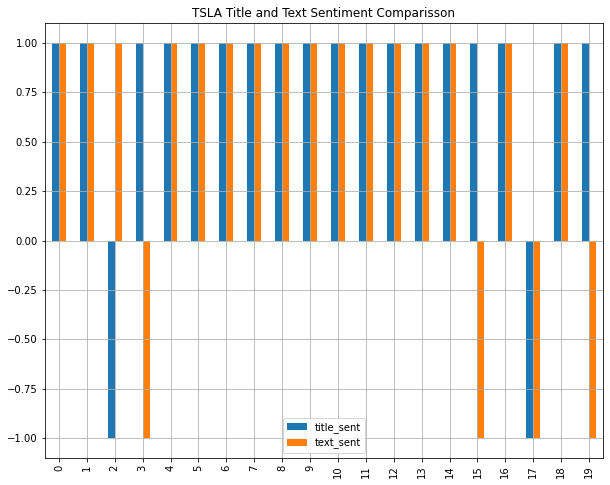

In [71]:
# Analyzing Sentiment Results via Plot
TSLA_2_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TSLA Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [72]:
TSLA_2_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000,20.000000
mean,0.054005,0.045350,0.013250,0.800000,0.075770,0.04285,0.02435,0.600000
std,0.200451,0.089996,0.041321,0.615587,0.304405,0.05840,0.03980,0.820783
min,-0.340000,0.000000,0.000000,-1.000000,-0.526700,0.00000,0.00000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000
75%,0.019050,0.014000,0.000000,1.000000,0.225725,0.06625,0.05775,1.000000
max,0.542300,0.293000,0.153000,1.000000,0.648600,0.18100,0.11100,1.000000


In [73]:
TSLA_2_Sentiment_df = TSLA_2_sent_df[["text", "text_sent"]] 
TSLA_2_Sentiment_df.head()

,text,text_sent
0,The US Consumer Product Safety Commission is l...,1
1,Billionaire Elon Musk reversed course on Tuesd...,1
2,A rare photo has surfaced of a fateful meeting...,1
3,Marketing is one of the most expensive things ...,-1
4,"March\r\n15, 2021\r\n4 min read\r\nThis story ...",1


# AAPL

In [74]:
# Fetch news about the AAPL stocks in 2021 in English
AAPL_2_news_en = newsapi.get_everything(
    q="AAPL",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
AAPL_2_news_en["totalResults"]

320

In [75]:
 # Creating a DataFrame with all the stocks news
AAPL_2_df = create_df(AAPL_2_news_en["articles"])
AAPL_2_df.head()

,date,title,description,text
0,2021-03-16T15:28:43Z,Apple faces a major test of how it enforces it...,Summary List PlacementApple could soon face a ...,Apple could soon face a major test of how stri...
1,2021-03-16T16:41:44Z,Is Skechers Stock Ready To Make A Run?,The iconic shoemaker has watched its shares ra...,"March\r\n16, 2021\r\n3 min read\r\nThis story ..."
2,2021-03-16T16:41:00Z,Is Skechers Stock Ready To Make A Run?,The iconic shoemaker has watched its shares ra...,"March\r\n16, 2021\r\n3 min read\r\nThis story ..."
3,2021-03-16T17:07:00Z,The Wall Street Journal: Google to cut commiss...,Alphabet Inc.'s Google is reducing the commiss...,"Alphabet Inc.s \r\n GOOG,\r\n +1.32%\r\nGoogle..."
4,2021-03-18T15:49:00Z,: This may be the best predictor of how likely...,"The redder the state, the more its residents a...","The redder the state, the more its residents a..."


In [76]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AAPL_2_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AAPL_2_sent_df = AAPL_2_df.join(title_sentiment_df).join(text_sentiment_df)

AAPL_2_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-16T15:28:43Z,Apple faces a major test of how it enforces it...,Summary List PlacementApple could soon face a ...,Apple could soon face a major test of how stri...,0.0000,0.000,0.000,1,0.3182,0.063,0.000,1
1,2021-03-16T16:41:44Z,Is Skechers Stock Ready To Make A Run?,The iconic shoemaker has watched its shares ra...,"March\r\n16, 2021\r\n3 min read\r\nThis story ...",0.3612,0.294,0.000,1,0.2960,0.062,0.000,1
2,2021-03-16T16:41:00Z,Is Skechers Stock Ready To Make A Run?,The iconic shoemaker has watched its shares ra...,"March\r\n16, 2021\r\n3 min read\r\nThis story ...",0.3612,0.294,0.000,1,0.2960,0.062,0.000,1
3,2021-03-16T17:07:00Z,The Wall Street Journal: Google to cut commiss...,Alphabet Inc.'s Google is reducing the commiss...,"Alphabet Inc.s \r\n GOOG,\r\n +1.32%\r\nGoogle...",-0.6597,0.000,0.330,-1,0.3400,0.130,0.061,1
4,2021-03-18T15:49:00Z,: This may be the best predictor of how likely...,"The redder the state, the more its residents a...","The redder the state, the more its residents a...",0.6124,0.206,0.059,1,-0.3400,0.000,0.062,-1


<AxesSubplot:title={'center':'AAPL Title and Text Sentiment Comparisson'}>

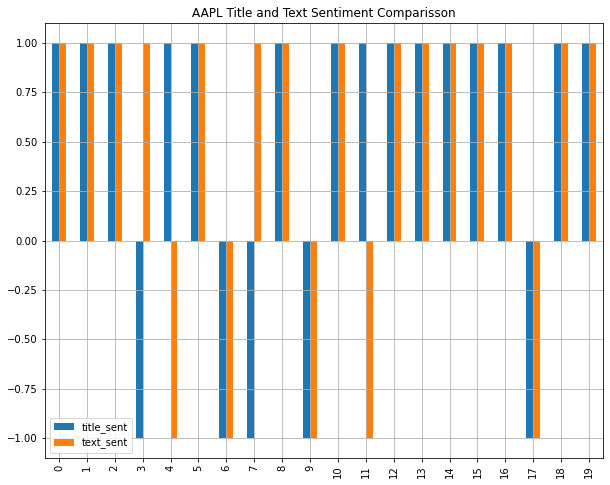

In [77]:
# Analyzing Sentiment Results via Plot
AAPL_2_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AAPL Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [78]:
AAPL_2_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.022310,0.094950,0.075150,0.500000,0.154295,0.074900,0.040850,0.500000
std,0.394675,0.119843,0.136311,0.888523,0.352534,0.059087,0.052413,0.888523
min,-0.743000,0.000000,0.000000,-1.000000,-0.557400,0.000000,0.000000,-1.000000
25%,-0.050575,0.000000,0.000000,0.500000,-0.025675,0.049500,0.000000,0.500000
50%,0.000000,0.000000,0.000000,1.000000,0.249150,0.067500,0.000000,1.000000
75%,0.345300,0.205250,0.082500,1.000000,0.376275,0.086250,0.065500,1.000000
max,0.612400,0.310000,0.441000,1.000000,0.690800,0.221000,0.145000,1.000000


In [79]:
AAPL_2_Sentiment_df = AAPL_2_sent_df[["text", "text_sent"]] 
AAPL_2_Sentiment_df.head()

,text,text_sent
0,Apple could soon face a major test of how stri...,1
1,"March\r\n16, 2021\r\n3 min read\r\nThis story ...",1
2,"March\r\n16, 2021\r\n3 min read\r\nThis story ...",1
3,"Alphabet Inc.s \r\n GOOG,\r\n +1.32%\r\nGoogle...",1
4,"The redder the state, the more its residents a...",-1


# FB

In [80]:
# Fetch news about the FB stocks in 2021 in English
FB_news_en = newsapi.get_everything(
    q="FB",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
FB_news_en["totalResults"]

370

In [81]:
 # Creating a DataFrame with all the stocks news
FB_df = create_df(FB_news_en["articles"])
FB_df.head()

,date,title,description,text
0,2021-03-19T02:48:03Z,Mark Zuckerberg says him 'smoking meats' is hi...,Summary List PlacementMark Zuckerberg has been...,Mark Zuckerberg has been the subject of countl...
1,2021-03-23T16:25:01Z,"The CEOs of Google, Facebook, and Twitter will...",Summary List PlacementTech's biggest figures w...,Tech's biggest figures will once again appear ...
2,2021-03-19T14:01:32Z,Young female Japanese biker is 50-year-old man...,Can't trust everything you see online these days.,There exists this Twitter account: azusagakuyu...
3,2021-03-19T06:59:00Z,Instagram For Kids? Facebook Said To Be Eyeing...,<ol><li>Instagram For Kids? Facebook Said To B...,Facebook Inc’s (NASDAQ: FB) social media app I...
4,2021-03-23T17:18:00Z,: Facebook Founder Mark Zuckerberg raised near...,"Mark Zuckerberg, founder, chairman and chief e...","Mark Zuckerberg, founder, chairman and chief e..."


In [82]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in FB_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
FB_sent_df = FB_df.join(title_sentiment_df).join(text_sentiment_df)

FB_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-19T02:48:03Z,Mark Zuckerberg says him 'smoking meats' is hi...,Summary List PlacementMark Zuckerberg has been...,Mark Zuckerberg has been the subject of countl...,0.4588,0.2,0.000,1,0.0000,0.000,0.000,1
1,2021-03-23T16:25:01Z,"The CEOs of Google, Facebook, and Twitter will...",Summary List PlacementTech's biggest figures w...,Tech's biggest figures will once again appear ...,-0.3182,0.0,0.087,-1,-0.1027,0.000,0.042,-1
2,2021-03-19T14:01:32Z,Young female Japanese biker is 50-year-old man...,Can't trust everything you see online these days.,There exists this Twitter account: azusagakuyu...,0.0000,0.0,0.000,1,0.3612,0.075,0.000,1
3,2021-03-19T06:59:00Z,Instagram For Kids? Facebook Said To Be Eyeing...,<ol><li>Instagram For Kids? Facebook Said To B...,Facebook Inc’s (NASDAQ: FB) social media app I...,0.0000,0.0,0.000,1,0.4767,0.081,0.000,1
4,2021-03-23T17:18:00Z,: Facebook Founder Mark Zuckerberg raised near...,"Mark Zuckerberg, founder, chairman and chief e...","Mark Zuckerberg, founder, chairman and chief e...",0.0000,0.0,0.000,1,0.0000,0.000,0.000,1


<AxesSubplot:title={'center':'FB Title and Text Sentiment Comparisson'}>

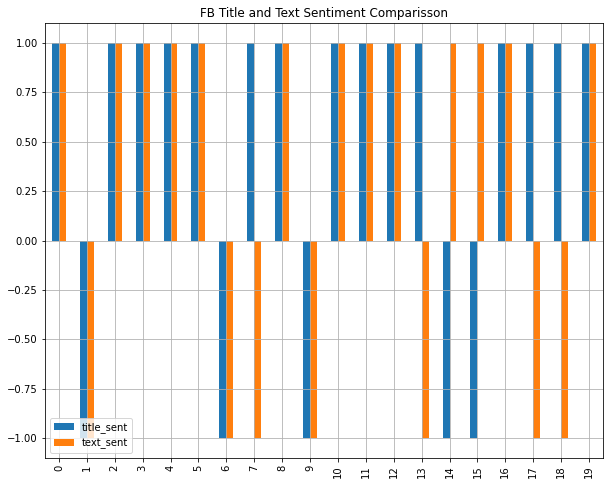

In [83]:
# Analyzing Sentiment Results via Plot
FB_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="FB Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [84]:
FB_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.000550,0.058200,0.068550,0.500000,0.145300,0.071400,0.043700,0.300000
std,0.384293,0.110925,0.130535,0.888523,0.487987,0.081208,0.076481,0.978721
min,-0.778300,0.000000,0.000000,-1.000000,-0.904200,0.000000,0.000000,-1.000000
25%,-0.067050,0.000000,0.000000,0.500000,-0.151025,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.062000,0.000000,1.000000
75%,0.074000,0.027000,0.100000,1.000000,0.513750,0.133750,0.071500,1.000000
max,0.706300,0.328000,0.493000,1.000000,0.844200,0.227000,0.319000,1.000000


In [85]:
FB_Sentiment_df = FB_sent_df[["text", "text_sent"]] 
FB_Sentiment_df.head()

,text,text_sent
0,Mark Zuckerberg has been the subject of countl...,1
1,Tech's biggest figures will once again appear ...,-1
2,There exists this Twitter account: azusagakuyu...,1
3,Facebook Inc’s (NASDAQ: FB) social media app I...,1
4,"Mark Zuckerberg, founder, chairman and chief e...",1


# UPST

In [86]:
# Fetch news about the UPST stocks in 2021 in English
UPST_news_en = newsapi.get_everything(
    q="UPST",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
UPST_news_en["totalResults"]

21

In [87]:
 # Creating a DataFrame with all the stocks news
UPST_df = create_df(UPST_news_en["articles"])
UPST_df.head()

,date,title,description,text
0,2021-03-18T03:00:39Z,"Upstart Holdings, Inc. (UPST) Q4 2020 Earnings...",UPST earnings call for the period ending Decem...,Image source: The Motley Fool.\r\nUpstart Hold...
1,2021-03-22T18:05:00Z,What's Happening With UPST Stock And ROKU Stoc...,One of the most common questions traders have ...,Commodity prices have historically run in cycl...
2,2021-03-18T21:37:09Z,Why Upstart Holdings (UPST) Soared 89% Today -...,<ol><li>Why Upstart Holdings (UPST) Soared 89%...,"(Bloomberg) -- In early 2019, industrialist Sa..."
3,2021-03-18T17:55:15Z,Wall Street Roundup: Bullish & Bearish Calls O...,"With continued volatility in the stock market,...","With continued volatility in the stock market,..."
4,2021-03-18T01:33:36Z,Dow Jones Futures: Dovish Fed Shores Up Stock ...,Dow Jones futures: A dovish Fed chief Powell g...,Dow Jones futures rose modestly late Wednesday...


In [88]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in UPST_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
UPST_sent_df = UPST_df.join(title_sentiment_df).join(text_sentiment_df)

UPST_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-18T03:00:39Z,"Upstart Holdings, Inc. (UPST) Q4 2020 Earnings...",UPST earnings call for the period ending Decem...,Image source: The Motley Fool.\r\nUpstart Hold...,0.0,0.0,0.0,1,-0.4404,0.000,0.108,-1
1,2021-03-22T18:05:00Z,What's Happening With UPST Stock And ROKU Stoc...,One of the most common questions traders have ...,Commodity prices have historically run in cycl...,0.0,0.0,0.0,1,0.5423,0.123,0.000,1
2,2021-03-18T21:37:09Z,Why Upstart Holdings (UPST) Soared 89% Today -...,<ol><li>Why Upstart Holdings (UPST) Soared 89%...,"(Bloomberg) -- In early 2019, industrialist Sa...",0.0,0.0,0.0,1,0.6908,0.147,0.000,1
3,2021-03-18T17:55:15Z,Wall Street Roundup: Bullish & Bearish Calls O...,"With continued volatility in the stock market,...","With continued volatility in the stock market,...",0.0,0.0,0.0,1,0.4588,0.079,0.000,1
4,2021-03-18T01:33:36Z,Dow Jones Futures: Dovish Fed Shores Up Stock ...,Dow Jones futures: A dovish Fed chief Powell g...,Dow Jones futures rose modestly late Wednesday...,0.0,0.0,0.0,1,0.4019,0.078,0.000,1


<AxesSubplot:title={'center':'UPST Title and Text Sentiment Comparisson'}>

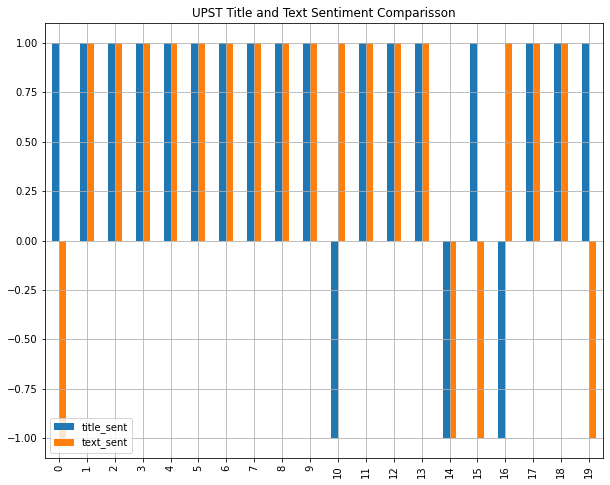

In [89]:
# Analyzing Sentiment Results via Plot
UPST_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="UPST Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [90]:
UPST_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.011025,0.034900,0.043350,0.700000,0.258730,0.086850,0.029000,0.600000
std,0.164725,0.091609,0.093012,0.732695,0.437632,0.075844,0.051546,0.820783
min,-0.526700,0.000000,0.000000,-1.000000,-0.726900,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.411700,0.093000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,0.639825,0.151250,0.046500,1.000000
max,0.381800,0.352000,0.298000,1.000000,0.750600,0.208000,0.169000,1.000000


In [91]:
UPST_Sentiment_df = UPST_sent_df[["text", "text_sent"]] 
UPST_Sentiment_df.head()

,text,text_sent
0,Image source: The Motley Fool.\r\nUpstart Hold...,-1
1,Commodity prices have historically run in cycl...,1
2,"(Bloomberg) -- In early 2019, industrialist Sa...",1
3,"With continued volatility in the stock market,...",1
4,Dow Jones futures rose modestly late Wednesday...,1


# AMZN

In [92]:
# Fetch news about the AMZN stocks in 2021 in English
AMZN_2_news_en = newsapi.get_everything(
    q="AMZN",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
AMZN_2_news_en["totalResults"]

339

In [93]:
 # Creating a DataFrame with all the stocks news
AMZN_2_df = create_df(AMZN_2_news_en["articles"])
AMZN_2_df.head()

,date,title,description,text
0,2021-03-23T21:33:43Z,Amazon is battling a union push in Alabama. He...,Summary List PlacementBetween now and March 30...,"Between now and March 30, roughly 6,000 Amazon..."
1,2021-03-22T20:13:00Z,Amazon is using new AI-powered cameras in deli...,"Summary List PlacementIn February, The Informa...","In February, The Information reported on an in..."
2,2021-03-18T20:02:12Z,Amazon's Asian employee group asks for 'explic...,Summary List PlacementAmazon's internal affini...,Amazon's internal affinity group representing ...
3,2021-03-22T14:33:40Z,A rare photo shows Elon Musk and Jeff Bezos ha...,Summary List PlacementA rare photo has surface...,A rare photo has surfaced of a fateful meeting...
4,2021-03-17T19:51:00Z,: Unity poaches Palo Alto Networks CFO,Palo Alto Networks Inc.'s chief financial offi...,Palo Alto Networks Inc.s chief financial offic...


In [94]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AMZN_2_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AMZN_2_sent_df = AMZN_2_df.join(title_sentiment_df).join(text_sentiment_df)

AMZN_2_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-23T21:33:43Z,Amazon is battling a union push in Alabama. He...,Summary List PlacementBetween now and March 30...,"Between now and March 30, roughly 6,000 Amazon...",-0.1027,0.101,0.125,-1,0.0516,0.093,0.06,1
1,2021-03-22T20:13:00Z,Amazon is using new AI-powered cameras in deli...,"Summary List PlacementIn February, The Informa...","In February, The Information reported on an in...",0.1779,0.082,0.000,1,0.1779,0.057,0.00,1
2,2021-03-18T20:02:12Z,Amazon's Asian employee group asks for 'explic...,Summary List PlacementAmazon's internal affini...,Amazon's internal affinity group representing ...,0.4019,0.109,0.000,1,0.6369,0.157,0.00,1
3,2021-03-22T14:33:40Z,A rare photo shows Elon Musk and Jeff Bezos ha...,Summary List PlacementA rare photo has surface...,A rare photo has surfaced of a fateful meeting...,-0.3400,0.000,0.112,-1,0.0000,0.000,0.00,1
4,2021-03-17T19:51:00Z,: Unity poaches Palo Alto Networks CFO,Palo Alto Networks Inc.'s chief financial offi...,Palo Alto Networks Inc.s chief financial offic...,0.0000,0.000,0.000,1,0.0000,0.000,0.00,1


<AxesSubplot:title={'center':'AMZN Title and Text Sentiment Comparisson'}>

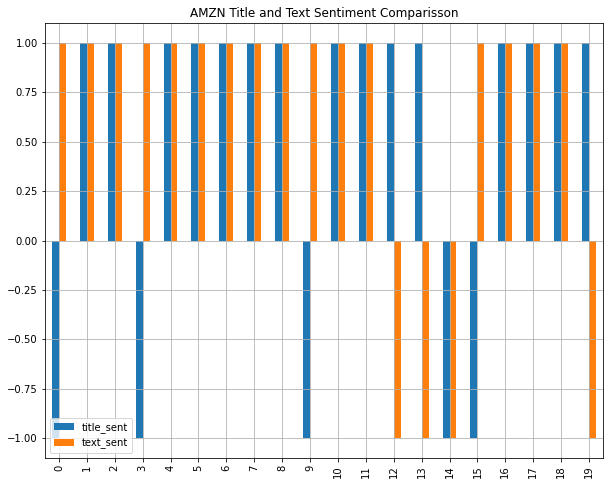

In [95]:
# Analyzing Sentiment Results via Plot
AMZN_2_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AMZN Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [96]:
AMZN_2_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.051890,0.106750,0.051100,0.500000,0.154650,0.078650,0.039400,0.600000
std,0.328038,0.106786,0.097953,0.888523,0.472932,0.077985,0.067835,0.820783
min,-0.636900,0.000000,0.000000,-1.000000,-0.735100,0.000000,0.000000,-1.000000
25%,-0.025675,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000
50%,0.088950,0.092000,0.000000,1.000000,0.177900,0.059500,0.000000,1.000000
75%,0.261500,0.197750,0.028000,1.000000,0.574275,0.132750,0.064000,1.000000
max,0.599400,0.302000,0.286000,1.000000,0.726900,0.238000,0.205000,1.000000


In [97]:
AMZN_2_Sentiment_df = AMZN_2_sent_df[["text", "text_sent"]] 
AMZN_2_Sentiment_df.head()

,text,text_sent
0,"Between now and March 30, roughly 6,000 Amazon...",1
1,"In February, The Information reported on an in...",1
2,Amazon's internal affinity group representing ...,1
3,A rare photo has surfaced of a fateful meeting...,1
4,Palo Alto Networks Inc.s chief financial offic...,1


# GME

In [98]:
# Fetch news about the GME stocks in 2021 in English
GME_2_news_en = newsapi.get_everything(
    q="GME",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
GME_2_news_en["totalResults"]

146

In [99]:
 # Creating a DataFrame with all the stocks news
GME_2_df = create_df(GME_2_news_en["articles"])
GME_2_df.head()

,date,title,description,text
0,2021-03-22T15:00:41Z,"Reddit ""apes"" support gorilla conservation","Some Reddit 'apes,' who apparently lack 'diamo...","""Apes Together Strong"" is a popular saying in ..."
1,2021-03-18T16:55:11Z,Vanda Research's retail-investor tracker naile...,Summary List PlacementPresident Joe Biden's $1...,"President Joe Biden's $1,400 stimulus checks a..."
2,2021-03-17T06:37:00Z,WallStreetBets Users Are Adopting Gorillas Wit...,"In January this year, the WallStreetBets subre...","In January this year, the WallStreetBets subre..."
3,2021-03-17T15:22:00Z,Capitol Report: Robinhood business model under...,Democrats took aim at aspects of zero-commissi...,Democrats took aim at aspects of zero-commissi...
4,2021-03-23T14:39:46Z,GameStop CCO Resigns Ahead Of Q4 Earnings Report,GameStop Corp. (NYSE: GME) shares traded lower...,Police say 21-year-old man charged with 10 mur...


In [100]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in GME_2_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
GME_2_sent_df = GME_2_df.join(title_sentiment_df).join(text_sentiment_df)

GME_2_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-22T15:00:41Z,"Reddit ""apes"" support gorilla conservation","Some Reddit 'apes,' who apparently lack 'diamo...","""Apes Together Strong"" is a popular saying in ...",0.4019,0.403,0.000,1,0.6597,0.170,0.047,1
1,2021-03-18T16:55:11Z,Vanda Research's retail-investor tracker naile...,Summary List PlacementPresident Joe Biden's $1...,"President Joe Biden's $1,400 stimulus checks a...",0.0000,0.000,0.000,1,0.3612,0.070,0.000,1
2,2021-03-17T06:37:00Z,WallStreetBets Users Are Adopting Gorillas Wit...,"In January this year, the WallStreetBets subre...","In January this year, the WallStreetBets subre...",0.3400,0.231,0.000,1,0.6202,0.168,0.000,1
3,2021-03-17T15:22:00Z,Capitol Report: Robinhood business model under...,Democrats took aim at aspects of zero-commissi...,Democrats took aim at aspects of zero-commissi...,-0.3400,0.000,0.179,-1,0.0000,0.000,0.000,1
4,2021-03-23T14:39:46Z,GameStop CCO Resigns Ahead Of Q4 Earnings Report,GameStop Corp. (NYSE: GME) shares traded lower...,Police say 21-year-old man charged with 10 mur...,-0.3182,0.000,0.247,-1,-0.9246,0.000,0.332,-1


<AxesSubplot:title={'center':'GME Title and Text Sentiment Comparisson'}>

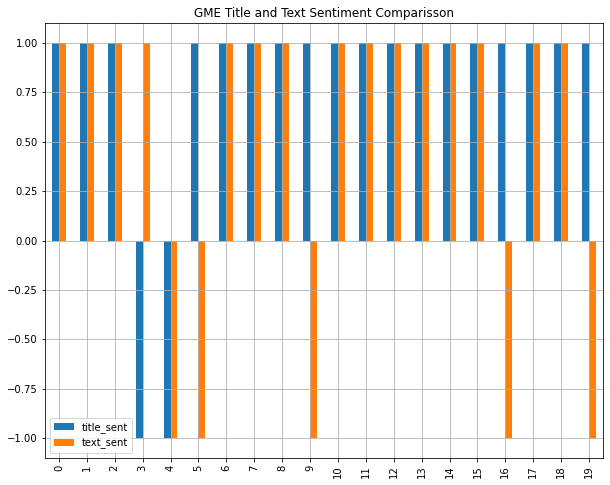

In [101]:
# Analyzing Sentiment Results via Plot
GME_2_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="GME Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [102]:
GME_2_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.034885,0.055950,0.021300,0.800000,0.132420,0.079950,0.059400,0.500000
std,0.180122,0.111167,0.066482,0.615587,0.464893,0.064184,0.081971,0.888523
min,-0.340000,0.000000,0.000000,-1.000000,-0.924600,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,-0.056575,0.000000,0.000000,0.500000
50%,0.000000,0.000000,0.000000,1.000000,0.179750,0.084500,0.047000,1.000000
75%,0.029475,0.029250,0.000000,1.000000,0.504000,0.141250,0.087000,1.000000
max,0.401900,0.403000,0.247000,1.000000,0.659700,0.170000,0.332000,1.000000


In [103]:
GME_2_Sentiment_df = GME_2_sent_df[["text", "text_sent"]] 
GME_2_Sentiment_df.head()

,text,text_sent
0,"""Apes Together Strong"" is a popular saying in ...",1
1,"President Joe Biden's $1,400 stimulus checks a...",1
2,"In January this year, the WallStreetBets subre...",1
3,Democrats took aim at aspects of zero-commissi...,1
4,Police say 21-year-old man charged with 10 mur...,-1


# TKAT

In [104]:
# Fetch news about the TKAT stocks in 2021 in English
TKAT_news_en = newsapi.get_everything(
    q="TKAT",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
TKAT_news_en["totalResults"]

9

In [105]:
 # Creating a DataFrame with all the stocks news
TKAT_df = create_df(TKAT_news_en["articles"])
TKAT_df.head()

,date,title,description,text
0,2021-03-18T19:02:28Z,"Why NFT Speculation Has Shares of Takung Art, ...",Investors seem to be speculating that these co...,What happened\r\nShares of Jiayin Group (NASDA...
1,2021-03-18T11:02:00Z,"Takung Art, Sino-Global Higher on Crypto-Relat...",Takung Art jumped amid talk the Chinese-based ...,Shares of Takung Art (TKAT) - Get Report leap...
2,2021-03-17T16:42:37Z,"LPCN, SGLB, NRG and CHFS among midday movers",Gainers:Takung Art (TKAT) +122%. Zhongchao (ZC...,<ul><li>Gainers:&nbsp;Takung Art (NYSEMKT:TKAT...
3,2021-03-22T12:24:26Z,"Banco Bilbao Vizcaya Argentaria, RLX Technolog...",RLX Technology (RLX) -40%.Takung Art (TKAT) -1...,<ul><li>RLX Technology (NYSE:RLX) -40%\r\n.</l...
4,2021-03-16T16:41:10Z,"SVRA, ZYNE, CANF and CLSK among midday movers",Gainers: SunLink Health Systems (SSY) +219%.Ca...,<ul><li>Gainers:&nbsp;SunLink Health Systems (...


In [106]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TKAT_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TKAT_sent_df = TKAT_df.join(title_sentiment_df).join(text_sentiment_df)

TKAT_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-18T19:02:28Z,"Why NFT Speculation Has Shares of Takung Art, ...",Investors seem to be speculating that these co...,What happened\r\nShares of Jiayin Group (NASDA...,0.7845,0.345,0.000,1,0.7845,0.203,0.0,1
1,2021-03-18T11:02:00Z,"Takung Art, Sino-Global Higher on Crypto-Relat...",Takung Art jumped amid talk the Chinese-based ...,Shares of Takung Art (TKAT) - Get Report leap...,0.0000,0.000,0.000,1,0.5267,0.124,0.0,1
2,2021-03-17T16:42:37Z,"LPCN, SGLB, NRG and CHFS among midday movers",Gainers:Takung Art (TKAT) +122%. Zhongchao (ZC...,<ul><li>Gainers:&nbsp;Takung Art (NYSEMKT:TKAT...,0.0000,0.000,0.000,1,0.0000,0.000,0.0,1
3,2021-03-22T12:24:26Z,"Banco Bilbao Vizcaya Argentaria, RLX Technolog...",RLX Technology (RLX) -40%.Takung Art (TKAT) -1...,<ul><li>RLX Technology (NYSE:RLX) -40%\r\n.</l...,-0.5267,0.000,0.274,-1,0.0000,0.000,0.0,1
4,2021-03-16T16:41:10Z,"SVRA, ZYNE, CANF and CLSK among midday movers",Gainers: SunLink Health Systems (SSY) +219%.Ca...,<ul><li>Gainers:&nbsp;SunLink Health Systems (...,0.0000,0.000,0.000,1,0.0000,0.000,0.0,1


<AxesSubplot:title={'center':'TKAT Title and Text Sentiment Comparisson'}>

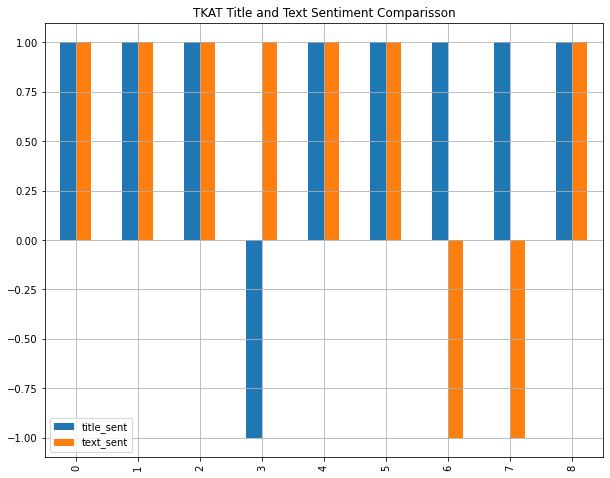

In [107]:
# Analyzing Sentiment Results via Plot
TKAT_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TKAT Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [108]:
TKAT_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.124411,0.079667,0.030444,0.777778,0.094744,0.041889,0.016000,0.555556
std,0.375027,0.128091,0.091333,0.666667,0.361631,0.073564,0.031753,0.881917
min,-0.526700,0.000000,0.000000,-1.000000,-0.318200,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.421500,0.177000,0.000000,1.000000,0.177900,0.050000,0.000000,1.000000
max,0.784500,0.345000,0.274000,1.000000,0.784500,0.203000,0.073000,1.000000


In [109]:
TKAT_Sentiment_df = TKAT_sent_df[["text", "text_sent"]] 
TKAT_Sentiment_df.head()

,text,text_sent
0,What happened\r\nShares of Jiayin Group (NASDA...,1
1,Shares of Takung Art (TKAT) - Get Report leap...,1
2,<ul><li>Gainers:&nbsp;Takung Art (NYSEMKT:TKAT...,1
3,<ul><li>RLX Technology (NYSE:RLX) -40%\r\n.</l...,1
4,<ul><li>Gainers:&nbsp;SunLink Health Systems (...,1


# LIFE

In [110]:
# Fetch news about the LIFE stocks in 2021 in English
LIFE_news_en = newsapi.get_everything(
    q="LIFE",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
LIFE_news_en["totalResults"]

48253

In [111]:
 # Creating a DataFrame with all the stocks news
LIFE_df = create_df(LIFE_news_en["articles"])
LIFE_df.head()

,date,title,description,text
0,2021-03-19T12:00:26Z,Modder brings the world of Bioshock to 'Half-L...,While you patiently wait for the next BioSchoc...,While you patiently wait for the next BioSchoc...
1,2021-03-18T18:06:48Z,GeForce Now doubles its price for newcomers to...,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...
2,2021-03-15T10:00:06Z,Life After the Vaccine in Israel,"Half the country has been inoculated, ushering...",Isabel Kershner contributed reporting.\r\nThe ...
3,2021-03-20T04:43:56Z,Australia warned of 'life threatening' flash f...,"Dozens of people are rescued from floodwaters,...",image captionUp to 100mm (four inches) of rain...
4,2021-03-15T13:00:00Z,Welcome to Lodge,"Welcome to Lodge, Lifehacker’s newest section ...","Welcome to Lodge, Lifehackers newest section e..."


In [112]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in LIFE_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
LIFE_sent_df = LIFE_df.join(title_sentiment_df).join(text_sentiment_df)

LIFE_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-19T12:00:26Z,Modder brings the world of Bioshock to 'Half-L...,While you patiently wait for the next BioSchoc...,While you patiently wait for the next BioSchoc...,0.0000,0.0,0.000,1,0.1531,0.049,0.000,1
1,2021-03-18T18:06:48Z,GeForce Now doubles its price for newcomers to...,Existing subscribers can keep paying $5/month ...,NVIDIA has doubled the price of the GeForce No...,0.0000,0.0,0.000,1,0.0000,0.000,0.000,1
2,2021-03-15T10:00:06Z,Life After the Vaccine in Israel,"Half the country has been inoculated, ushering...",Isabel Kershner contributed reporting.\r\nThe ...,0.0000,0.0,0.000,1,0.0000,0.000,0.000,1
3,2021-03-20T04:43:56Z,Australia warned of 'life threatening' flash f...,"Dozens of people are rescued from floodwaters,...",image captionUp to 100mm (four inches) of rain...,-0.6705,0.0,0.524,-1,-0.8126,0.000,0.219,-1
4,2021-03-15T13:00:00Z,Welcome to Lodge,"Welcome to Lodge, Lifehacker’s newest section ...","Welcome to Lodge, Lifehackers newest section e...",0.4588,0.6,0.000,1,0.8205,0.186,0.000,1


<AxesSubplot:title={'center':'LIFE Title and Text Sentiment Comparisson'}>

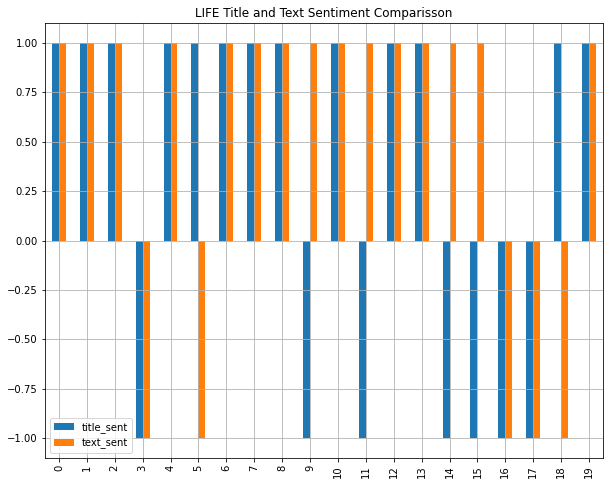

In [113]:
# Analyzing Sentiment Results via Plot
LIFE_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="LIFE Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [114]:
LIFE_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.008610,0.111800,0.109200,0.300000,0.069295,0.050150,0.034550,0.500000
std,0.419597,0.179298,0.183881,0.978721,0.447422,0.069103,0.063763,0.888523
min,-0.840200,0.000000,0.000000,-1.000000,-0.812600,0.000000,0.000000,-1.000000
25%,-0.245000,0.000000,0.000000,-1.000000,-0.007625,0.000000,0.000000,0.500000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.017500,0.000000,1.000000
75%,0.289900,0.177750,0.158750,1.000000,0.278900,0.067000,0.051500,1.000000
max,0.726900,0.600000,0.600000,1.000000,0.844200,0.221000,0.219000,1.000000


In [115]:
LIFE_Sentiment_df = LIFE_sent_df[["text", "text_sent"]] 
LIFE_Sentiment_df.head()

,text,text_sent
0,While you patiently wait for the next BioSchoc...,1
1,NVIDIA has doubled the price of the GeForce No...,1
2,Isabel Kershner contributed reporting.\r\nThe ...,1
3,image captionUp to 100mm (four inches) of rain...,-1
4,"Welcome to Lodge, Lifehackers newest section e...",1


# PLUG

In [116]:
# Fetch news about the PLUG stocks in 2021 in English
PLUG_news_en = newsapi.get_everything(
    q="PLUG",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
PLUG_news_en["totalResults"]

2615

In [117]:
 # Creating a DataFrame with all the stocks news
PLUG_df = create_df(PLUG_news_en["articles"])
PLUG_df.head()

,date,title,description,text
0,2021-03-22T21:11:27Z,This USB-C gadget from hell brings back the wo...,Engineer Pim de Groot has built a truly cursed...,Photo: Pim de Groot (@mifune) / Twitter\r\n\n ...
1,2021-03-20T03:50:43Z,Tablo rolls out a $200 quad-tuner DVR with HDMI,This $200 DVR can record up to four programs a...,For cord-cutters who don't get all of their TV...
2,2021-03-15T16:43:46Z,Apple pulls the plug on the HomePod,"""We are focusing our efforts on HomePod mini,""...",1 with 1 posters participating\r\n<ul><li>\r\n...
3,2021-03-17T16:30:00Z,How to Transfer Your Signal Message History Be...,Signal is testing a new wifi transfer tool for...,Signal is testing a new wifi transfer tool for...
4,2021-03-22T14:00:00Z,Try This iOS 14.5 Option to Get Your Security ...,"iOS 14.5 should be right around the corner, ju...","iOS 14.5 should be right around the corner, ju..."


In [118]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in PLUG_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
PLUG_sent_df = PLUG_df.join(title_sentiment_df).join(text_sentiment_df)

PLUG_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-22T21:11:27Z,This USB-C gadget from hell brings back the wo...,Engineer Pim de Groot has built a truly cursed...,Photo: Pim de Groot (@mifune) / Twitter\r\n\n ...,-0.8658,0.000,0.465,-1,-0.4172,0.050,0.14,-1
1,2021-03-20T03:50:43Z,Tablo rolls out a $200 quad-tuner DVR with HDMI,This $200 DVR can record up to four programs a...,For cord-cutters who don't get all of their TV...,0.0000,0.000,0.000,1,0.0000,0.000,0.00,1
2,2021-03-15T16:43:46Z,Apple pulls the plug on the HomePod,"""We are focusing our efforts on HomePod mini,""...",1 with 1 posters participating\r\n<ul><li>\r\n...,0.0000,0.000,0.000,1,0.2732,0.070,0.00,1
3,2021-03-17T16:30:00Z,How to Transfer Your Signal Message History Be...,Signal is testing a new wifi transfer tool for...,Signal is testing a new wifi transfer tool for...,0.0000,0.000,0.000,1,0.3612,0.068,0.00,1
4,2021-03-22T14:00:00Z,Try This iOS 14.5 Option to Get Your Security ...,"iOS 14.5 should be right around the corner, ju...","iOS 14.5 should be right around the corner, ju...",0.3400,0.194,0.000,1,0.0000,0.000,0.00,1


<AxesSubplot:title={'center':'PLUG Title and Text Sentiment Comparisson'}>

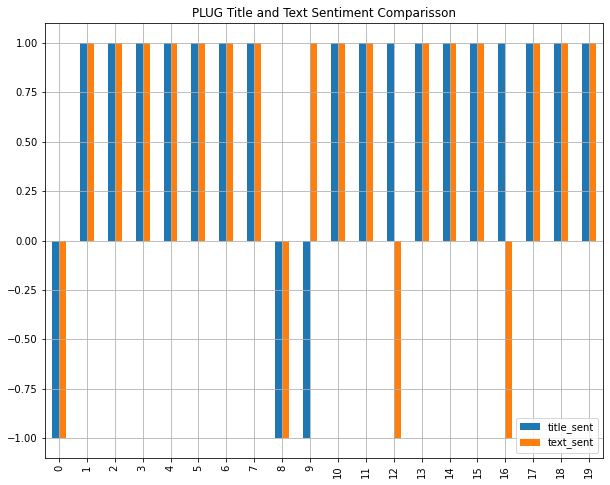

In [119]:
# Analyzing Sentiment Results via Plot
PLUG_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="PLUG Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [120]:
PLUG_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.012890,0.06940,0.047050,0.700000,0.269095,0.095650,0.031800,0.600000
std,0.314227,0.14179,0.123281,0.732695,0.413639,0.086594,0.046758,0.820783
min,-0.865800,0.00000,0.000000,-1.000000,-0.417200,0.000000,0.000000,-1.000000
25%,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.00000,0.000000,1.000000,0.317200,0.075500,0.000000,1.000000
75%,0.000000,0.03500,0.000000,1.000000,0.670500,0.165750,0.054000,1.000000
max,0.765000,0.52400,0.465000,1.000000,0.908100,0.285000,0.140000,1.000000


In [121]:
PLUG_Sentiment_df = PLUG_sent_df[["text", "text_sent"]] 
PLUG_Sentiment_df.head()

,text,text_sent
0,Photo: Pim de Groot (@mifune) / Twitter\r\n\n ...,-1
1,For cord-cutters who don't get all of their TV...,1
2,1 with 1 posters participating\r\n<ul><li>\r\n...,1
3,Signal is testing a new wifi transfer tool for...,1
4,"iOS 14.5 should be right around the corner, ju...",1


# BOX

In [122]:
# Fetch news about the PLUG stocks in 2021 in English
BOX_news_en = newsapi.get_everything(
    q="BOX",
    from_param='2021-03-15',
    to='2021-03-23',
    language="en"
)

# Show the total number of news
BOX_news_en["totalResults"]

10897

In [123]:
 # Creating a DataFrame with all the stocks news
BOX_df = create_df(BOX_news_en["articles"])
BOX_df.head()

,date,title,description,text
0,2021-03-22T20:47:03Z,Box shares rise on report company is exploring...,"Shares of Box, a well-known content-and-collab...","Shares of Box, a well-known content-and-collab..."
1,2021-03-22T11:45:04Z,The Morning After: Brazil wants in-box charger...,Apple is fined in Brazil for selling iPhones w...,Getting rid of smartphone excess is hard. Just...
2,2021-03-17T09:00:21Z,Artifacts of the Lost Year,"A fake fur box from Prada, a wood glider from ...","Netflix, email, Zoom its all in one place, so ..."
3,2021-03-17T10:00:08Z,Why Shop at a Specialty Nursery?,"If you buy all your plants at a big-box store,...","Among many botanical relationships, Mr. Bowen ..."
4,2021-03-16T15:59:24Z,Get feedback on your pitch deck from tech lead...,The importance of the pitch deck can’t be unde...,The importance of the pitch deck cant be under...


In [124]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in BOX_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
BOX_sent_df = BOX_df.join(title_sentiment_df).join(text_sentiment_df)

BOX_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-22T20:47:03Z,Box shares rise on report company is exploring...,"Shares of Box, a well-known content-and-collab...","Shares of Box, a well-known content-and-collab...",0.2960,0.216,0.000,1,0.2960,0.075,0.000,1
1,2021-03-22T11:45:04Z,The Morning After: Brazil wants in-box charger...,Apple is fined in Brazil for selling iPhones w...,Getting rid of smartphone excess is hard. Just...,0.0000,0.000,0.000,1,0.0258,0.041,0.038,1
2,2021-03-17T09:00:21Z,Artifacts of the Lost Year,"A fake fur box from Prada, a wood glider from ...","Netflix, email, Zoom its all in one place, so ...",-0.3182,0.000,0.365,-1,-0.3586,0.033,0.068,-1
3,2021-03-17T10:00:08Z,Why Shop at a Specialty Nursery?,"If you buy all your plants at a big-box store,...","Among many botanical relationships, Mr. Bowen ...",0.0000,0.000,0.000,1,0.0000,0.000,0.000,1
4,2021-03-16T15:59:24Z,Get feedback on your pitch deck from tech lead...,The importance of the pitch deck can’t be unde...,The importance of the pitch deck cant be under...,0.0000,0.000,0.000,1,0.2862,0.087,0.000,1


<AxesSubplot:title={'center':'BOX Title and Text Sentiment Comparisson'}>

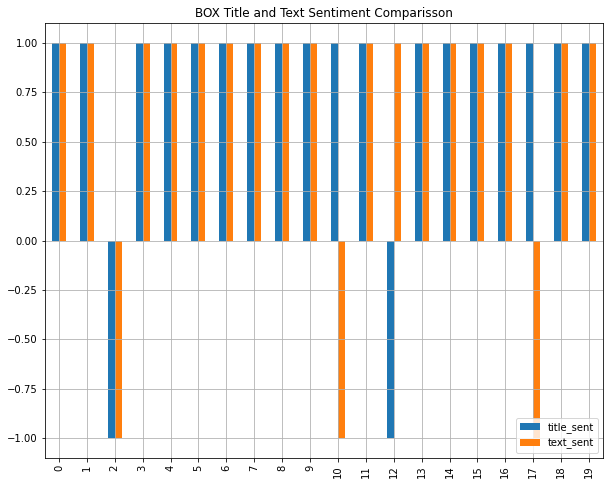

In [125]:
# Analyzing Sentiment Results via Plot
BOX_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="BOX Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [126]:
BOX_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.152600,0.116400,0.030900,0.800000,0.232155,0.082400,0.027400,0.700000
std,0.289353,0.155859,0.088988,0.615587,0.411585,0.064576,0.052184,0.732695
min,-0.318200,0.000000,0.000000,-1.000000,-0.636900,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.024750,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.291100,0.081000,0.000000,1.000000
75%,0.301550,0.225000,0.000000,1.000000,0.585900,0.128750,0.042000,1.000000
max,0.709600,0.496000,0.365000,1.000000,0.827100,0.199000,0.217000,1.000000


In [127]:
BOX_Sentiment_df = BOX_sent_df[["text", "text_sent"]] 
BOX_Sentiment_df.head()

,text,text_sent
0,"Shares of Box, a well-known content-and-collab...",1
1,Getting rid of smartphone excess is hard. Just...,1
2,"Netflix, email, Zoom its all in one place, so ...",-1
3,"Among many botanical relationships, Mr. Bowen ...",1
4,The importance of the pitch deck cant be under...,1


# Sentiments of Stocks(GME, TSLA, AAPL, PLTR, CCIV, AMC, SQ, AMZN, TWTR, NVDA), in Date Range (03/14-03/09)

# GME

In [128]:
# Fetch news about the GME stocks in 2021 in English
GME_3_news_en = newsapi.get_everything(
    q="GME",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
GME_3_news_en["totalResults"]

135

In [129]:
 # Creating a DataFrame with all the stocks news
GME_3_df = create_df(GME_3_news_en["articles"])
GME_3_df.head()

,date,title,description,text
0,2021-03-10T20:56:27Z,New data suggests GameStop's latest surge is b...,Summary List PlacementGameStop is back in the ...,GameStop is back in the spotlight with big ups...
1,2021-03-10T20:24:19Z,GameStop stock hit with 6 trading halts as vol...,Summary List Placement<ul>\n<li>GameStop stock...,GameStop has been the centre of markets' atten...
2,2021-03-11T18:18:00Z,Dow Jones Hits Record High With Biden Set To S...,<ol><li>Dow Jones Hits Record High With Biden ...,The Dow Jones Industrial Average hit a new rec...
3,2021-03-09T22:06:51Z,GameStop stock keeps moving up Tuesday - CNET,The traders with diamond hands are seeing big ...,GME to the moon.\r\nGetty Images\r\nGameStop s...
4,2021-03-12T17:10:12Z,GameStop jumps 14% to resume its climb back to...,Summary List Placement<ul>\n<li>GameStop surge...,GameStop millionaire Roaring Kitty\r\nRoaring ...


In [130]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in GME_3_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
GME_3_sent_df = GME_3_df.join(title_sentiment_df).join(text_sentiment_df)

GME_3_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-10T20:56:27Z,New data suggests GameStop's latest surge is b...,Summary List PlacementGameStop is back in the ...,GameStop is back in the spotlight with big ups...,0.0000,0.000,0.0,1,0.0000,0.000,0.000,1
1,2021-03-10T20:24:19Z,GameStop stock hit with 6 trading halts as vol...,Summary List Placement<ul>\n<li>GameStop stock...,GameStop has been the centre of markets' atten...,0.0000,0.000,0.0,1,0.2960,0.071,0.000,1
2,2021-03-11T18:18:00Z,Dow Jones Hits Record High With Biden Set To S...,<ol><li>Dow Jones Hits Record High With Biden ...,The Dow Jones Industrial Average hit a new rec...,0.0000,0.000,0.0,1,0.5267,0.091,0.000,1
3,2021-03-09T22:06:51Z,GameStop stock keeps moving up Tuesday - CNET,The traders with diamond hands are seeing big ...,GME to the moon.\r\nGetty Images\r\nGameStop s...,0.0000,0.000,0.0,1,0.2960,0.116,0.059,1
4,2021-03-12T17:10:12Z,GameStop jumps 14% to resume its climb back to...,Summary List Placement<ul>\n<li>GameStop surge...,GameStop millionaire Roaring Kitty\r\nRoaring ...,0.2263,0.106,0.0,1,0.0000,0.000,0.000,1


<AxesSubplot:title={'center':'GME_3 Title and Text Sentiment Comparisson'}>

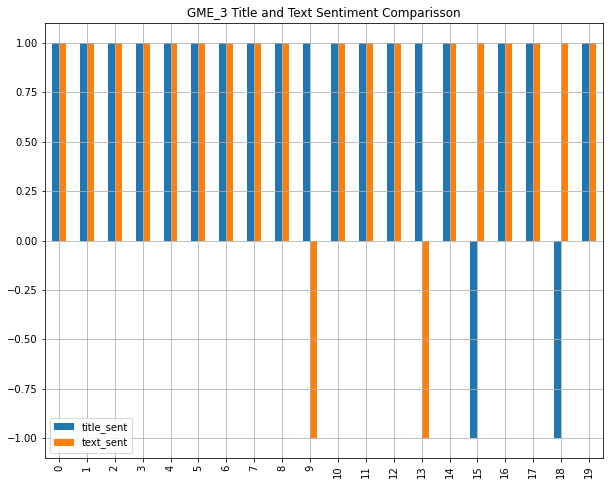

In [131]:
# Analyzing Sentiment Results via Plot
GME_3_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="GME_3 Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [132]:
GME_3_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.211570,0.164400,0.041200,0.800000,0.268425,0.098000,0.022150,0.800000
std,0.309027,0.159395,0.082828,0.615587,0.325062,0.127801,0.035829,0.615587
min,-0.318200,0.000000,0.000000,-1.000000,-0.476700,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.126050,0.205000,0.000000,1.000000,0.296000,0.074500,0.000000,1.000000
75%,0.411525,0.253750,0.016500,1.000000,0.549700,0.119250,0.056000,1.000000
max,0.829400,0.507000,0.274000,1.000000,0.680800,0.577000,0.094000,1.000000


In [133]:
GME_3_Sentiment_df = GME_3_sent_df[["text", "text_sent"]] 
GME_3_Sentiment_df.head()

,text,text_sent
0,GameStop is back in the spotlight with big ups...,1
1,GameStop has been the centre of markets' atten...,1
2,The Dow Jones Industrial Average hit a new rec...,1
3,GME to the moon.\r\nGetty Images\r\nGameStop s...,1
4,GameStop millionaire Roaring Kitty\r\nRoaring ...,1


# TSLA

In [134]:
# Fetch news about the GME stocks in 2021 in English
TSLA_3_news_en = newsapi.get_everything(
    q="TSLA",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
TSLA_3_news_en["totalResults"]

219

In [135]:
 # Creating a DataFrame with all the stocks news
TSLA_3_df = create_df(TSLA_3_news_en["articles"])
TSLA_3_df.head()

,date,title,description,text
0,2021-03-13T20:05:15Z,Tesla factory reported hundreds of COVID-19 ca...,Tesla reported hundreds of COVID-19 cases at i...,Tesla's determination to restart EV production...
1,2021-03-14T10:37:00Z,It's time to retire comparisons between Apple ...,"Summary List PlacementFor years, comparisons b...","For years, comparisons between Apple and Tesla..."
2,2021-03-11T16:26:05Z,EV startup Canoo unveils quirky pickup coming ...,Summary List PlacementYet another startup is e...,Yet another startup is entering the battery-po...
3,2021-03-14T11:56:00Z,"Tesla just hiked prices by up to $10,000 — her...",Summary List PlacementTesla is known to quietl...,Tesla is known to quietly raise and lower is p...
4,2021-03-11T18:47:57Z,"The rotation into cyclical stocks isn't over, ...",Summary List PlacementThe bounce back in techn...,The bounce back in technology stocks does not ...


In [136]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TSLA_3_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TSLA_3_sent_df = TSLA_3_df.join(title_sentiment_df).join(text_sentiment_df)

TSLA_3_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-13T20:05:15Z,Tesla factory reported hundreds of COVID-19 ca...,Tesla reported hundreds of COVID-19 cases at i...,Tesla's determination to restart EV production...,0.0,0.0,0.0,1,0.4019,0.080,0.000,1
1,2021-03-14T10:37:00Z,It's time to retire comparisons between Apple ...,"Summary List PlacementFor years, comparisons b...","For years, comparisons between Apple and Tesla...",0.0,0.0,0.0,1,-0.5574,0.000,0.096,-1
2,2021-03-11T16:26:05Z,EV startup Canoo unveils quirky pickup coming ...,Summary List PlacementYet another startup is e...,Yet another startup is entering the battery-po...,0.0,0.0,0.0,1,0.0000,0.000,0.000,1
3,2021-03-14T11:56:00Z,"Tesla just hiked prices by up to $10,000 — her...",Summary List PlacementTesla is known to quietl...,Tesla is known to quietly raise and lower is p...,0.0,0.0,0.0,1,0.0772,0.061,0.054,1
4,2021-03-11T18:47:57Z,"The rotation into cyclical stocks isn't over, ...",Summary List PlacementThe bounce back in techn...,The bounce back in technology stocks does not ...,0.0,0.0,0.0,1,0.2500,0.056,0.000,1


<AxesSubplot:title={'center':'TSLA_3 Title and Text Sentiment Comparisson'}>

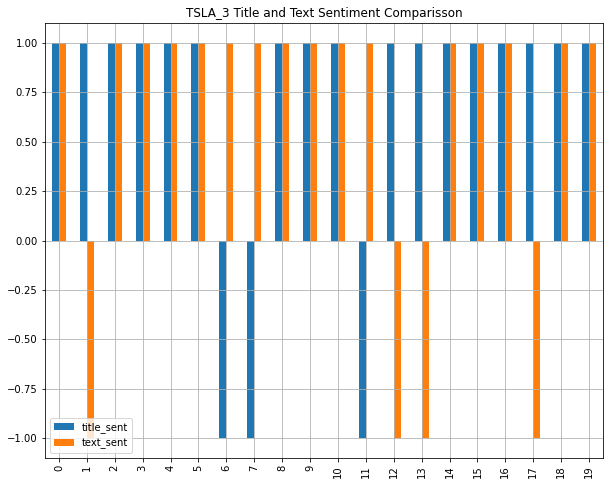

In [137]:
# Analyzing Sentiment Results via Plot
TSLA_3_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TSLA_3 Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [138]:
TSLA_3_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.080285,0.05370,0.033800,0.700000,0.196930,0.081250,0.033000,0.600000
std,0.239485,0.09562,0.073897,0.732695,0.399676,0.079136,0.045534,0.820783
min,-0.296000,0.00000,0.000000,-1.000000,-0.557400,0.000000,0.000000,-1.000000
25%,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.00000,0.000000,1.000000,0.163600,0.065500,0.000000,1.000000
75%,0.272500,0.08950,0.000000,1.000000,0.561025,0.146500,0.070000,1.000000
max,0.493900,0.31800,0.231000,1.000000,0.802000,0.233000,0.134000,1.000000


In [139]:
TSLA_3_Sentiment_df = TSLA_3_sent_df[["text", "text_sent"]] 
TSLA_3_Sentiment_df.head()

,text,text_sent
0,Tesla's determination to restart EV production...,1
1,"For years, comparisons between Apple and Tesla...",-1
2,Yet another startup is entering the battery-po...,1
3,Tesla is known to quietly raise and lower is p...,1
4,The bounce back in technology stocks does not ...,1


# AAPL

In [140]:
# Fetch news about the GME stocks in 2021 in English
AAPL_3_news_en = newsapi.get_everything(
    q="AAPL",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
AAPL_3_news_en["totalResults"]

244

In [141]:
 # Creating a DataFrame with all the stocks news
AAPL_3_df = create_df(AAPL_3_news_en["articles"])
AAPL_3_df.head()

,date,title,description,text
0,2021-03-14T10:37:00Z,It's time to retire comparisons between Apple ...,"Summary List PlacementFor years, comparisons b...","For years, comparisons between Apple and Tesla..."
1,2021-03-11T16:32:04Z,Apple's reported plan to build a car the way i...,Summary List PlacementAs discussions between s...,As discussions between several traditional aut...
2,2021-03-10T03:04:43Z,Hannity: The whole world is watching President...,'Hannity' hosts questions what US enemies thin...,Fridays momentum melted away like snow in the ...
3,2021-03-12T14:59:28Z,"iPhone demand weakness just 'noise,' outlook r...",Investment bank Morgan Stanley calls recent re...,Investment bank Morgan Stanley calls recent re...
4,2021-03-12T17:12:00Z,Dow Jones Hits Record High As Nasdaq Gets Slam...,<ol><li>Dow Jones Hits Record High As Nasdaq G...,The Dow Jones Industrial Average rose but the ...


In [142]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AAPL_3_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AAPL_3_sent_df = AAPL_3_df.join(title_sentiment_df).join(text_sentiment_df)

AAPL_3_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-14T10:37:00Z,It's time to retire comparisons between Apple ...,"Summary List PlacementFor years, comparisons b...","For years, comparisons between Apple and Tesla...",0.0000,0.000,0.000,1,-0.5574,0.000,0.096,-1
1,2021-03-11T16:32:04Z,Apple's reported plan to build a car the way i...,Summary List PlacementAs discussions between s...,As discussions between several traditional aut...,-0.2023,0.065,0.093,-1,0.0000,0.000,0.000,1
2,2021-03-10T03:04:43Z,Hannity: The whole world is watching President...,'Hannity' hosts questions what US enemies thin...,Fridays momentum melted away like snow in the ...,-0.3612,0.000,0.238,-1,0.3612,0.060,0.000,1
3,2021-03-12T14:59:28Z,"iPhone demand weakness just 'noise,' outlook r...",Investment bank Morgan Stanley calls recent re...,Investment bank Morgan Stanley calls recent re...,0.0000,0.226,0.295,1,-0.1531,0.075,0.118,-1
4,2021-03-12T17:12:00Z,Dow Jones Hits Record High As Nasdaq Gets Slam...,<ol><li>Dow Jones Hits Record High As Nasdaq G...,The Dow Jones Industrial Average rose but the ...,0.0000,0.000,0.000,1,-0.4215,0.000,0.083,-1


<AxesSubplot:title={'center':'AAPL_3 Title and Text Sentiment Comparisson'}>

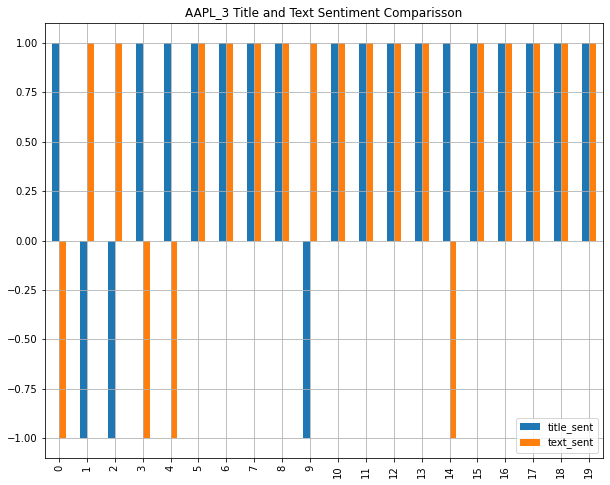

In [143]:
# Analyzing Sentiment Results via Plot
AAPL_3_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AAPL_3 Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [144]:
AAPL_3_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.026860,0.062300,0.036100,0.700000,0.260955,0.081600,0.024650,0.600000
std,0.178016,0.102834,0.084439,0.732695,0.392132,0.065392,0.040822,0.820783
min,-0.361200,0.000000,0.000000,-1.000000,-0.557400,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.045000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.350600,0.070000,0.000000,1.000000
75%,0.006450,0.093500,0.000000,1.000000,0.526700,0.114250,0.048750,1.000000
max,0.421500,0.310000,0.295000,1.000000,0.778300,0.187000,0.118000,1.000000


In [145]:
AAPL_3_Sentiment_df = AAPL_3_sent_df[["text", "text_sent"]] 
AAPL_3_Sentiment_df.head()

,text,text_sent
0,"For years, comparisons between Apple and Tesla...",-1
1,As discussions between several traditional aut...,1
2,Fridays momentum melted away like snow in the ...,1
3,Investment bank Morgan Stanley calls recent re...,-1
4,The Dow Jones Industrial Average rose but the ...,-1


# PLTR

In [146]:
# Fetch news about the PLTR stocks in 2021 in English
PLTR_news_en = newsapi.get_everything(
    q="PLTR",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
PLTR_news_en["totalResults"]

27

In [147]:
 # Creating a DataFrame with all the stocks news
PLTR_df = create_df(PLTR_news_en["articles"])
PLTR_df.head()

,date,title,description,text
0,2021-03-11T14:10:32Z,Palantir Strikes Long-Term Partnership With Fr...,Palantir Technologies Inc. (NASDAQ: PLTR) shar...,Lets talk volatility. The NASDAQ kicked off th...
1,2021-03-12T15:30:15Z,Palantir And BlackBerry: 2 Disruptors Trying T...,Palantir Technologies Inc (NYSE: PLTR) and Bla...,Palantir Technologies Inc (NYSE: PLTR) and Bla...
2,2021-03-09T20:04:00Z,What Is Roblox Worth? We’ll Know More Today.,The videogaming platform Roblox will begin tra...,"Roblox, which is going public Wednesday via a ..."
3,2021-03-12T15:13:24Z,$190 Billion Of Stimulus Money Could Go Straig...,Stimulus check money is likely to find its way...,POLAND - 2021/02/19: In this photo illustratio...
4,2021-03-09T19:59:17Z,"Nasdaq Spikes 500 Points, Led By Tesla, Peloto...",The Nasdaq held a bullish gain in afternoon tr...,The Nasdaq 100 rebounded sharply Tuesday and h...


In [148]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in PLTR_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
PLTR_sent_df = PLTR_df.join(title_sentiment_df).join(text_sentiment_df)

PLTR_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-11T14:10:32Z,Palantir Strikes Long-Term Partnership With Fr...,Palantir Technologies Inc. (NASDAQ: PLTR) shar...,Lets talk volatility. The NASDAQ kicked off th...,-0.3612,0.000,0.161,-1,0.0000,0.000,0.0,1
1,2021-03-12T15:30:15Z,Palantir And BlackBerry: 2 Disruptors Trying T...,Palantir Technologies Inc (NYSE: PLTR) and Bla...,Palantir Technologies Inc (NYSE: PLTR) and Bla...,0.0000,0.000,0.000,1,0.0000,0.000,0.0,1
2,2021-03-09T20:04:00Z,What Is Roblox Worth? We’ll Know More Today.,The videogaming platform Roblox will begin tra...,"Roblox, which is going public Wednesday via a ...",0.2263,0.213,0.000,1,0.2960,0.061,0.0,1
3,2021-03-12T15:13:24Z,$190 Billion Of Stimulus Money Could Go Straig...,Stimulus check money is likely to find its way...,POLAND - 2021/02/19: In this photo illustratio...,0.2263,0.147,0.000,1,0.4019,0.088,0.0,1
4,2021-03-09T19:59:17Z,"Nasdaq Spikes 500 Points, Led By Tesla, Peloto...",The Nasdaq held a bullish gain in afternoon tr...,The Nasdaq 100 rebounded sharply Tuesday and h...,0.3400,0.156,0.000,1,0.7003,0.167,0.0,1


<AxesSubplot:title={'center':'PLTR Title and Text Sentiment Comparisson'}>

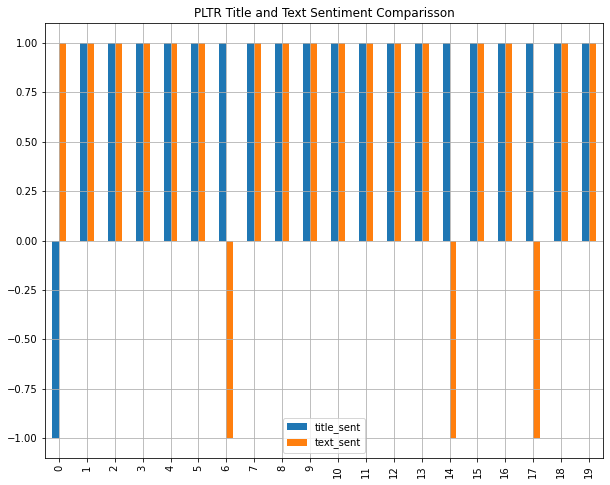

In [149]:
# Analyzing Sentiment Results via Plot
PLTR_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="PLTR Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [150]:
PLTR_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.197790,0.124800,0.013250,0.900000,0.234355,0.076300,0.028000,0.700000
std,0.279317,0.145505,0.041818,0.447214,0.362778,0.085526,0.037228,0.732695
min,-0.361200,0.000000,0.000000,-1.000000,-0.440400,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.138950,0.132000,0.000000,1.000000,0.148000,0.061000,0.000000,1.000000
75%,0.350450,0.198500,0.000000,1.000000,0.492250,0.148250,0.058750,1.000000
max,0.778300,0.464000,0.161000,1.000000,0.796400,0.256000,0.108000,1.000000


In [151]:
PLTR_Sentiment_df = PLTR_sent_df[["text", "text_sent"]] 
PLTR_Sentiment_df.head()

,text,text_sent
0,Lets talk volatility. The NASDAQ kicked off th...,1
1,Palantir Technologies Inc (NYSE: PLTR) and Bla...,1
2,"Roblox, which is going public Wednesday via a ...",1
3,POLAND - 2021/02/19: In this photo illustratio...,1
4,The Nasdaq 100 rebounded sharply Tuesday and h...,1


# CCIV

In [152]:
# Fetch news about the CCIV stocks in 2021 in English
CCIV_news_en = newsapi.get_everything(
    q="CCIV",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
CCIV_news_en["totalResults"]

11

In [153]:
 # Creating a DataFrame with all the stocks news
CCIV_df = create_df(CCIV_news_en["articles"])
CCIV_df.head()

,date,title,description,text
0,2021-03-14T15:17:13Z,Lucid's CEO reveals why he's launching an elec...,Summary List PlacementAfter an extremely slow ...,"After an extremely slow start, many analysts b..."
1,2021-03-10T05:03:52Z,5 EV Stocks To Buy Before Stimulus Checks Caus...,High quality EV stocks are oversold from early...,Many high growth EV stocks are down YTD from l...
2,2021-03-11T21:57:48Z,Future Happening Now – Trillions in Flying Car...,The technology that we long believed would cha...,The technology that we long believed would cha...
3,2021-03-11T16:59:28Z,Jaws Spitfire Acquisition Corporation: SpaceX ...,Barry Sternlicht's Jaws Spitfire SPAC is rumor...,This is a bit of a tough note to write. I don'...
4,2021-03-09T20:35:32Z,Starboard Value Acquisition Company: Market Ov...,The Starboard Value SPAC embedded a 1/6th tont...,Starboard Value Acquisition Company (SVAC) is ...


In [154]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in CCIV_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
CCIV_sent_df = CCIV_df.join(title_sentiment_df).join(text_sentiment_df)

CCIV_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-14T15:17:13Z,Lucid's CEO reveals why he's launching an elec...,Summary List PlacementAfter an extremely slow ...,"After an extremely slow start, many analysts b...",0.00,0.000,0.0,1,0.6369,0.136,0.000,1
1,2021-03-10T05:03:52Z,5 EV Stocks To Buy Before Stimulus Checks Caus...,High quality EV stocks are oversold from early...,Many high growth EV stocks are down YTD from l...,0.00,0.000,0.0,1,0.3818,0.064,0.000,1
2,2021-03-11T21:57:48Z,Future Happening Now – Trillions in Flying Car...,The technology that we long believed would cha...,The technology that we long believed would cha...,0.00,0.000,0.0,1,0.0000,0.000,0.000,1
3,2021-03-11T16:59:28Z,Jaws Spitfire Acquisition Corporation: SpaceX ...,Barry Sternlicht's Jaws Spitfire SPAC is rumor...,This is a bit of a tough note to write. I don'...,0.00,0.000,0.0,1,-0.8262,0.000,0.212,-1
4,2021-03-09T20:35:32Z,Starboard Value Acquisition Company: Market Ov...,The Starboard Value SPAC embedded a 1/6th tont...,Starboard Value Acquisition Company (SVAC) is ...,0.34,0.255,0.0,1,0.5859,0.146,0.000,1


<AxesSubplot:title={'center':'CCIV Title and Text Sentiment Comparisson'}>

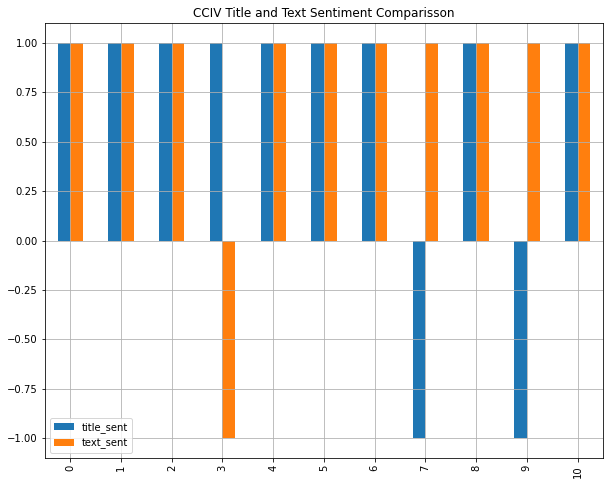

In [155]:
# Analyzing Sentiment Results via Plot
CCIV_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="CCIV Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [156]:
CCIV_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.037845,0.060727,0.017000,0.636364,0.366709,0.105000,0.022727,0.818182
std,0.236040,0.104864,0.039026,0.809040,0.478788,0.081882,0.063801,0.603023
min,-0.478200,0.000000,0.000000,-1.000000,-0.826200,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.190900,0.032000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.585900,0.136000,0.000000,1.000000
75%,0.148000,0.098000,0.000000,1.000000,0.642350,0.144000,0.000000,1.000000
max,0.361200,0.255000,0.115000,1.000000,0.822500,0.236000,0.212000,1.000000


In [157]:
CCIV_Sentiment_df = CCIV_sent_df[["text", "text_sent"]] 
CCIV_Sentiment_df.head()

,text,text_sent
0,"After an extremely slow start, many analysts b...",1
1,Many high growth EV stocks are down YTD from l...,1
2,The technology that we long believed would cha...,1
3,This is a bit of a tough note to write. I don'...,-1
4,Starboard Value Acquisition Company (SVAC) is ...,1


# AMC

In [158]:
# Fetch news about the AMC stocks in 2021 in English
AMC_news_en = newsapi.get_everything(
    q="AMC",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
AMC_news_en["totalResults"]

502

In [159]:
 # Creating a DataFrame with all the stocks news
AMC_df = create_df(AMC_news_en["articles"])
AMC_df.head()

,date,title,description,text
0,2021-03-09T04:41:26Z,"What's on TV: 'Cherry,' 'Last Chance U' and 'A...",This week's highlight game release is an updat...,This week's highlight game release is an updat...
1,2021-03-12T23:24:00Z,AMC theaters to start reopening in Los Angeles...,"AMC Entertainment, the world's largest cinema ...",By Reuters Staff\r\nFILE PHOTO: Guests wearing...
2,2021-03-10T21:34:00Z,AMC Entertainment beats revenue estimates as p...,AMC Entertainment Holdings Inc beat fourth-qua...,By Reuters Staff\r\nFILE PHOTO: Closed signs a...
3,2021-03-12T23:09:00Z,AMC theaters to start reopening in Los Angeles...,"AMC Entertainment, the world's largest cinema ...","By Reuters Staff\r\nLOS ANGELES, March 12 (Reu..."
4,2021-03-09T10:15:43Z,The Return of High Schools in New York City,Students who signed up for in-person learning ...,"Class Disrupted\r\nUpdated March 8, 2021\r\nTh..."


In [160]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AMC_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AMC_sent_df = AMC_df.join(title_sentiment_df).join(text_sentiment_df)

AMC_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-09T04:41:26Z,"What's on TV: 'Cherry,' 'Last Chance U' and 'A...",This week's highlight game release is an updat...,This week's highlight game release is an updat...,0.2500,0.200,0.0,1,-0.0772,0.060,0.067,-1
1,2021-03-12T23:24:00Z,AMC theaters to start reopening in Los Angeles...,"AMC Entertainment, the world's largest cinema ...",By Reuters Staff\r\nFILE PHOTO: Guests wearing...,0.0000,0.000,0.0,1,0.0000,0.000,0.000,1
2,2021-03-10T21:34:00Z,AMC Entertainment beats revenue estimates as p...,AMC Entertainment Holdings Inc beat fourth-qua...,By Reuters Staff\r\nFILE PHOTO: Closed signs a...,0.4215,0.219,0.0,1,0.0000,0.000,0.000,1
3,2021-03-12T23:09:00Z,AMC theaters to start reopening in Los Angeles...,"AMC Entertainment, the world's largest cinema ...","By Reuters Staff\r\nLOS ANGELES, March 12 (Reu...",0.0000,0.000,0.0,1,0.4215,0.083,0.000,1
4,2021-03-09T10:15:43Z,The Return of High Schools in New York City,Students who signed up for in-person learning ...,"Class Disrupted\r\nUpdated March 8, 2021\r\nTh...",0.0000,0.000,0.0,1,0.1027,0.040,0.000,1


<AxesSubplot:title={'center':'AMC Title and Text Sentiment Comparisson'}>

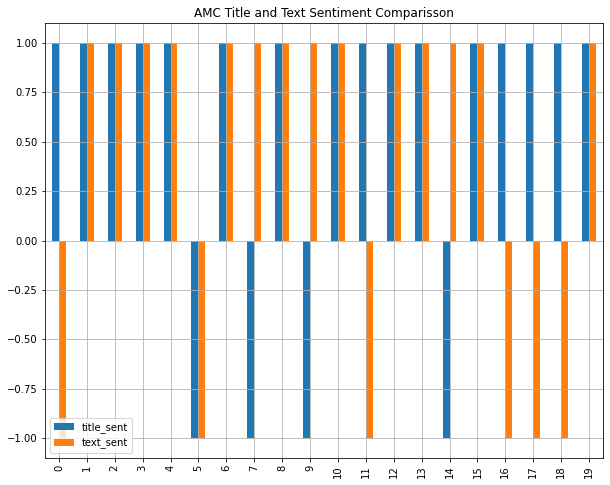

In [161]:
# Analyzing Sentiment Results via Plot
AMC_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AMC Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [162]:
AMC_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.144270,0.130100,0.04930,0.600000,0.151990,0.068750,0.039350,0.400000
std,0.315565,0.144987,0.08241,0.820783,0.327823,0.061104,0.047615,0.940325
min,-0.318200,0.000000,0.00000,-1.000000,-0.440400,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.00000,1.000000,-0.038650,0.000000,0.000000,-1.000000
50%,0.000000,0.054500,0.00000,1.000000,0.051350,0.067000,0.000000,1.000000
75%,0.421500,0.259000,0.08675,1.000000,0.402525,0.091250,0.080500,1.000000
max,0.829400,0.375000,0.22300,1.000000,0.680800,0.201000,0.132000,1.000000


In [163]:
AMC_Sentiment_df = AMC_sent_df[["text", "text_sent"]] 
AMC_Sentiment_df.head()

,text,text_sent
0,This week's highlight game release is an updat...,-1
1,By Reuters Staff\r\nFILE PHOTO: Guests wearing...,1
2,By Reuters Staff\r\nFILE PHOTO: Closed signs a...,1
3,"By Reuters Staff\r\nLOS ANGELES, March 12 (Reu...",1
4,"Class Disrupted\r\nUpdated March 8, 2021\r\nTh...",1


# SQ

In [164]:
# Fetch news about the SQ stocks in 2021 in English
SQ_news_en = newsapi.get_everything(
    q="SQ",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
SQ_news_en["totalResults"]

297

In [165]:
 # Creating a DataFrame with all the stocks news
SQ_df = create_df(SQ_news_en["articles"])
SQ_df.head()

,date,title,description,text
0,2021-03-10T16:32:15Z,Norilsk Nickel: Mining firm pays record $2bn f...,"The spill happened last May and saw some 21,00...",image captionThe spill happened last May and s...
1,2021-03-13T14:31:25Z,The Morning After: Apple will discontinue the ...,<ol><li>The Morning After: Apple will disconti...,"TORONTO, March 13, 2021 (GLOBE NEWSWIRE) -- In..."
2,2021-03-13T19:50:00Z,"COVID-19 outbreak, 44 cases reported at BC gla...","COVID-19 outbreak, 44 cases reported at BC gla...",Fraser Health Public Health has declared a COV...
3,2021-03-13T18:50:00Z,"COVID-19 outbreak, 44 cases reported at BC gla...","COVID-19 outbreak, 44 cases reported at BC gla...",Fraser Health Public Health has declared a COV...
4,2021-03-13T19:50:00Z,"COVID-19 outbreak, 44 cases reported at BC gla...","<p>So far, 44 employees at Vitrum have tested ...",Fraser Health Public Health has declared a COV...


In [166]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in SQ_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
SQ_sent_df = SQ_df.join(title_sentiment_df).join(text_sentiment_df)

SQ_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-10T16:32:15Z,Norilsk Nickel: Mining firm pays record $2bn f...,"The spill happened last May and saw some 21,00...",image captionThe spill happened last May and s...,0.2023,0.141,0.0,1,0.4767,0.108,0.0,1
1,2021-03-13T14:31:25Z,The Morning After: Apple will discontinue the ...,<ol><li>The Morning After: Apple will disconti...,"TORONTO, March 13, 2021 (GLOBE NEWSWIRE) -- In...",0.3182,0.173,0.0,1,0.6369,0.136,0.0,1
2,2021-03-13T19:50:00Z,"COVID-19 outbreak, 44 cases reported at BC gla...","COVID-19 outbreak, 44 cases reported at BC gla...",Fraser Health Public Health has declared a COV...,0.0000,0.000,0.0,1,0.0000,0.000,0.0,1
3,2021-03-13T18:50:00Z,"COVID-19 outbreak, 44 cases reported at BC gla...","COVID-19 outbreak, 44 cases reported at BC gla...",Fraser Health Public Health has declared a COV...,0.0000,0.000,0.0,1,0.0000,0.000,0.0,1
4,2021-03-13T19:50:00Z,"COVID-19 outbreak, 44 cases reported at BC gla...","<p>So far, 44 employees at Vitrum have tested ...",Fraser Health Public Health has declared a COV...,0.0000,0.000,0.0,1,0.0000,0.000,0.0,1


<AxesSubplot:title={'center':'SQ Title and Text Sentiment Comparisson'}>

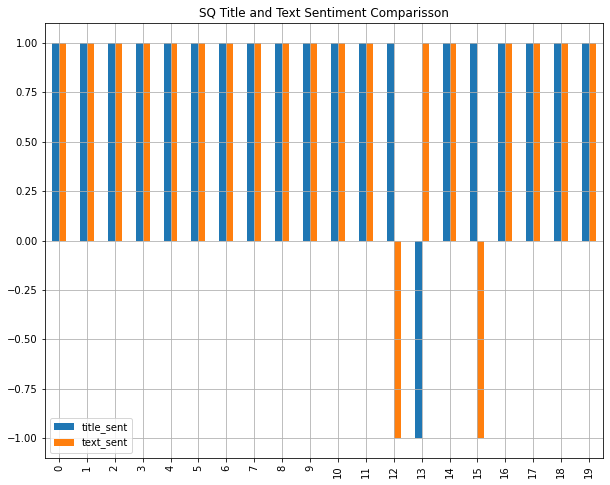

In [167]:
# Analyzing Sentiment Results via Plot
SQ_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="SQ Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [168]:
SQ_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,0.070190,0.05125,0.016250,0.900000,0.279545,0.07825,0.011150,0.800000
std,0.225868,0.08507,0.072672,0.447214,0.402381,0.09265,0.036748,0.615587
min,-0.521600,0.00000,0.000000,-1.000000,-0.636900,0.00000,0.000000,-1.000000
25%,0.000000,0.00000,0.000000,1.000000,0.000000,0.00000,0.000000,1.000000
50%,0.000000,0.00000,0.000000,1.000000,0.176350,0.06300,0.000000,1.000000
75%,0.089275,0.09450,0.000000,1.000000,0.598650,0.11500,0.000000,1.000000
max,0.611400,0.23100,0.325000,1.000000,0.950100,0.35100,0.152000,1.000000


In [169]:
SQ_Sentiment_df = SQ_sent_df[["text", "text_sent"]] 
SQ_Sentiment_df.head()

,text,text_sent
0,image captionThe spill happened last May and s...,1
1,"TORONTO, March 13, 2021 (GLOBE NEWSWIRE) -- In...",1
2,Fraser Health Public Health has declared a COV...,1
3,Fraser Health Public Health has declared a COV...,1
4,Fraser Health Public Health has declared a COV...,1


# AMZN

In [170]:
# Fetch news about the AMZN stocks in 2021 in English
AMZN_3_news_en = newsapi.get_everything(
    q="AMZN",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
AMZN_3_news_en["totalResults"]

248

In [171]:
 # Creating a DataFrame with all the stocks news
AMZN_3_df = create_df(AMZN_3_news_en["articles"])
AMZN_3_df.head()

,date,title,description,text
0,2021-03-11T18:56:32Z,NFLPA Issues Statement Supporting Amazon Wareh...,The NFL Players' Association released a statem...,Jay Reeves/Associated Press\r\nThe NFL Players...
1,2021-03-11T18:18:00Z,Dow Jones Hits Record High With Biden Set To S...,<ol><li>Dow Jones Hits Record High With Biden ...,The Dow Jones Industrial Average hit a new rec...
2,2021-03-11T12:20:00Z,"Need to Know: Watch Apple, Tesla, and these ot...",Concerns about inflation were tempered on Wedn...,"The Dow Jones Industrial Average \r\n DJIA,\r\..."
3,2021-03-11T22:45:10Z,Amazon (AMZN) Outpaces Stock Market Gains: Wha...,"Amazon (AMZN) closed at $3,113.59 in the lates...",Amazon (AMZN) closed the most recent trading d...
4,2021-03-09T22:37:55Z,The FAANGs Are Expected to Rule 2021 Markets,"The FAANGs: Facebook (NASDAQ: FB), Amazon (NAS...",GettyAny interview conducted with Meghan Markl...


In [172]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in AMZN_3_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
AMZN_3_sent_df = AMZN_3_df.join(title_sentiment_df).join(text_sentiment_df)

AMZN_3_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-11T18:56:32Z,NFLPA Issues Statement Supporting Amazon Wareh...,The NFL Players' Association released a statem...,Jay Reeves/Associated Press\r\nThe NFL Players...,0.5574,0.434,0.0,1,0.5574,0.150,0.00,1
1,2021-03-11T18:18:00Z,Dow Jones Hits Record High With Biden Set To S...,<ol><li>Dow Jones Hits Record High With Biden ...,The Dow Jones Industrial Average hit a new rec...,0.0000,0.000,0.0,1,0.5267,0.091,0.00,1
2,2021-03-11T12:20:00Z,"Need to Know: Watch Apple, Tesla, and these ot...",Concerns about inflation were tempered on Wedn...,"The Dow Jones Industrial Average \r\n DJIA,\r\...",0.0000,0.000,0.0,1,0.6808,0.181,0.04,1
3,2021-03-11T22:45:10Z,Amazon (AMZN) Outpaces Stock Market Gains: Wha...,"Amazon (AMZN) closed at $3,113.59 in the lates...",Amazon (AMZN) closed the most recent trading d...,0.4767,0.339,0.0,1,0.6249,0.130,0.00,1
4,2021-03-09T22:37:55Z,The FAANGs Are Expected to Rule 2021 Markets,"The FAANGs: Facebook (NASDAQ: FB), Amazon (NAS...",GettyAny interview conducted with Meghan Markl...,0.0000,0.000,0.0,1,0.0000,0.000,0.00,1


<AxesSubplot:title={'center':'AMZN_3 Title and Text Sentiment Comparisson'}>

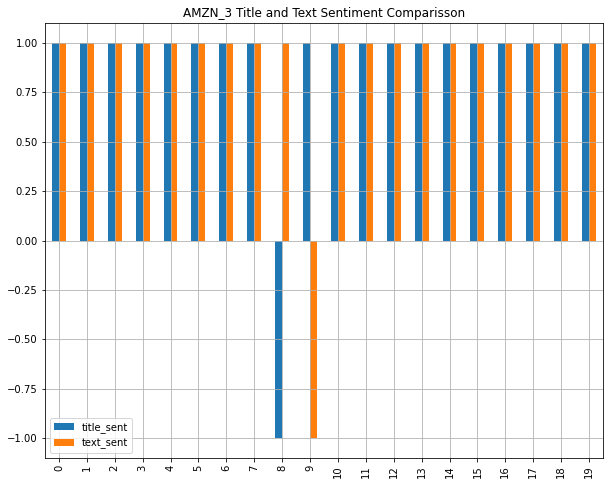

In [173]:
# Analyzing Sentiment Results via Plot
AMZN_3_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="AMZN_3 Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [174]:
AMZN_3_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.164140,0.127350,0.009900,0.900000,0.389810,0.113750,0.009650,0.900000
std,0.280542,0.151869,0.044274,0.447214,0.325183,0.087183,0.024928,0.447214
min,-0.493900,0.000000,0.000000,-1.000000,-0.273200,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.196200,0.050750,0.000000,1.000000
50%,0.088950,0.034500,0.000000,1.000000,0.360900,0.099000,0.000000,1.000000
75%,0.336700,0.234750,0.000000,1.000000,0.647875,0.176750,0.000000,1.000000
max,0.757900,0.434000,0.198000,1.000000,0.883200,0.267000,0.090000,1.000000


In [175]:
AMZN_3_Sentiment_df = AMZN_3_sent_df[["text", "text_sent"]] 
AMZN_3_Sentiment_df.head()

,text,text_sent
0,Jay Reeves/Associated Press\r\nThe NFL Players...,1
1,The Dow Jones Industrial Average hit a new rec...,1
2,"The Dow Jones Industrial Average \r\n DJIA,\r\...",1
3,Amazon (AMZN) closed the most recent trading d...,1
4,GettyAny interview conducted with Meghan Markl...,1


# TWTR

In [176]:
# Fetch news about the TWTR stocks in 2021 in English
TWTR_news_en = newsapi.get_everything(
    q="TWTR",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
TWTR_news_en["totalResults"]

30

In [177]:
 # Creating a DataFrame with all the stocks news
TWTR_df = create_df(TWTR_news_en["articles"])
TWTR_df.head()

,date,title,description,text
0,2021-03-10T12:20:00Z,: Russia slows down Twitter speed and demands ...,The Russian government ordered on Wednesday a ...,The Russian government ordered on Wednesday a ...
1,2021-03-12T18:37:00Z,": Duke, Kentucky and Virginia could all miss t...",Three of the most popular college basketball t...,The Atlantic Coast Conference has canceled a t...
2,2021-03-11T17:43:25Z,Is Twitter Inc. (TWTR) A Smart Long-Term Buy?,"GDS Investments, an investment management firm...","GDS Investments, an investment management firm..."
3,2021-03-09T12:46:18Z,"Twitter sues Texas AG, claiming retaliation fo...",Twitter has filed a lawsuit against Texas Atto...,Twitter has filed a lawsuit against Texas Atto...
4,2021-03-11T19:40:00Z,"5 Stocks Set to Drop and 5 That Could Pop, Acc...",Stocks that are out of favor can sometimes see...,The bank assessed the individual stocks in sta...


In [178]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in TWTR_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
TWTR_sent_df = TWTR_df.join(title_sentiment_df).join(text_sentiment_df)

TWTR_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-10T12:20:00Z,: Russia slows down Twitter speed and demands ...,The Russian government ordered on Wednesday a ...,The Russian government ordered on Wednesday a ...,0.0000,0.00,0.000,1,-0.5994,0.000,0.149,-1
1,2021-03-12T18:37:00Z,": Duke, Kentucky and Virginia could all miss t...",Three of the most popular college basketball t...,The Atlantic Coast Conference has canceled a t...,-0.6249,0.00,0.317,-1,0.3400,0.101,0.061,1
2,2021-03-11T17:43:25Z,Is Twitter Inc. (TWTR) A Smart Long-Term Buy?,"GDS Investments, an investment management firm...","GDS Investments, an investment management firm...",0.4019,0.31,0.000,1,-0.5719,0.000,0.101,-1
3,2021-03-09T12:46:18Z,"Twitter sues Texas AG, claiming retaliation fo...",Twitter has filed a lawsuit against Texas Atto...,Twitter has filed a lawsuit against Texas Atto...,-0.5574,0.00,0.265,-1,-0.2263,0.000,0.058,-1
4,2021-03-11T19:40:00Z,"5 Stocks Set to Drop and 5 That Could Pop, Acc...",Stocks that are out of favor can sometimes see...,The bank assessed the individual stocks in sta...,-0.2732,0.00,0.174,-1,0.2960,0.062,0.000,1


<AxesSubplot:title={'center':'TWTR Title and Text Sentiment Comparisson'}>

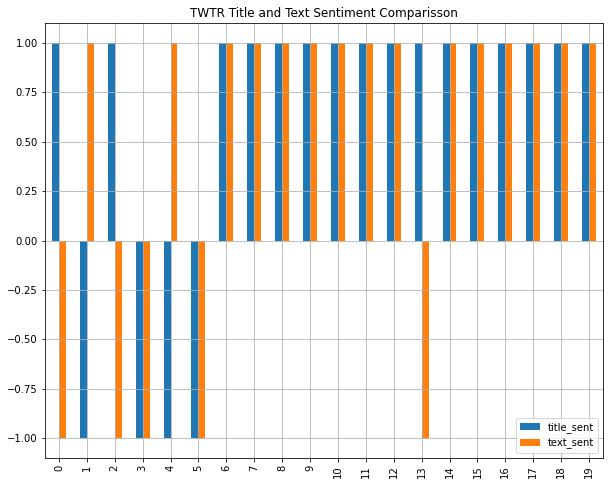

In [179]:
# Analyzing Sentiment Results via Plot
TWTR_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="TWTR Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [180]:
TWTR_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.022280,0.098900,0.061500,0.600000,0.208985,0.079100,0.037250,0.500000
std,0.370891,0.180821,0.135728,0.820783,0.451511,0.074094,0.051814,0.888523
min,-0.743000,0.000000,0.000000,-1.000000,-0.599400,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,-0.056575,0.000000,0.000000,0.500000
50%,0.000000,0.000000,0.000000,1.000000,0.318000,0.069500,0.000000,1.000000
75%,0.231275,0.154750,0.000000,1.000000,0.599125,0.150000,0.067250,1.000000
max,0.612400,0.625000,0.474000,1.000000,0.777400,0.208000,0.149000,1.000000


In [181]:
TWTR_Sentiment_df = TWTR_sent_df[["text", "text_sent"]] 
TWTR_Sentiment_df.head()

,text,text_sent
0,The Russian government ordered on Wednesday a ...,-1
1,The Atlantic Coast Conference has canceled a t...,1
2,"GDS Investments, an investment management firm...",-1
3,Twitter has filed a lawsuit against Texas Atto...,-1
4,The bank assessed the individual stocks in sta...,1


# NVDA

In [182]:
# Fetch news about the NVDA stocks in 2021 in English
NVDA_news_en = newsapi.get_everything(
    q="NVDA",
    from_param='2021-03-14',
    to='2021-03-09',
    language="en"
)

# Show the total number of news
NVDA_news_en["totalResults"]

39

In [183]:
 # Creating a DataFrame with all the stocks news
NVDA_df = create_df(NVDA_news_en["articles"])
NVDA_df.head()

,date,title,description,text
0,2021-03-12T19:56:53Z,What Will the Ethereum Protocol Changes Do for...,The crypto bull market remains in full throttl...,The crypto bull market remains in full throttl...
1,2021-03-11T17:53:44Z,Is NVIDIA Corp. (NVDA) A Smart Long-Term Buy?,"Mairs & Power, an investment management firm, ...","Mairs &amp; Power, an investment management fi..."
2,2021-03-11T14:20:00Z,Have Nvidia Shares Finally Hit Bottom?,"Nvidia has been hammered from its highs, down ...",Nvidia (NVDA) - Get Report has been a bit of ...
3,2021-03-11T19:01:00Z,Jim Cramer: Would You Sell GameStop Now?,The most important thing if you are a GameStop...,You can only hate and love so much. The love f...
4,2021-03-09T21:08:00Z,Nvidia stock leads chip rally as tech shares b...,Nvidia stock leads chip rally as tech shares b...,Nvidia Corp.s stock and the broader chip secto...


In [184]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in NVDA_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
NVDA_sent_df = NVDA_df.join(title_sentiment_df).join(text_sentiment_df)

NVDA_sent_df.head()

,date,title,description,text,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
0,2021-03-12T19:56:53Z,What Will the Ethereum Protocol Changes Do for...,The crypto bull market remains in full throttl...,The crypto bull market remains in full throttl...,0.0000,0.000,0.0,1,0.4404,0.075,0.000,1
1,2021-03-11T17:53:44Z,Is NVIDIA Corp. (NVDA) A Smart Long-Term Buy?,"Mairs & Power, an investment management firm, ...","Mairs &amp; Power, an investment management fi...",0.4019,0.310,0.0,1,0.3818,0.075,0.000,1
2,2021-03-11T14:20:00Z,Have Nvidia Shares Finally Hit Bottom?,"Nvidia has been hammered from its highs, down ...",Nvidia (NVDA) - Get Report has been a bit of ...,0.2960,0.306,0.0,1,0.2023,0.050,0.000,1
3,2021-03-11T19:01:00Z,Jim Cramer: Would You Sell GameStop Now?,The most important thing if you are a GameStop...,You can only hate and love so much. The love f...,0.0000,0.000,0.0,1,0.6908,0.178,0.079,1
4,2021-03-09T21:08:00Z,Nvidia stock leads chip rally as tech shares b...,Nvidia stock leads chip rally as tech shares b...,Nvidia Corp.s stock and the broader chip secto...,0.2960,0.180,0.0,1,0.7506,0.171,0.000,1


<AxesSubplot:title={'center':'NVDA Title and Text Sentiment Comparisson'}>

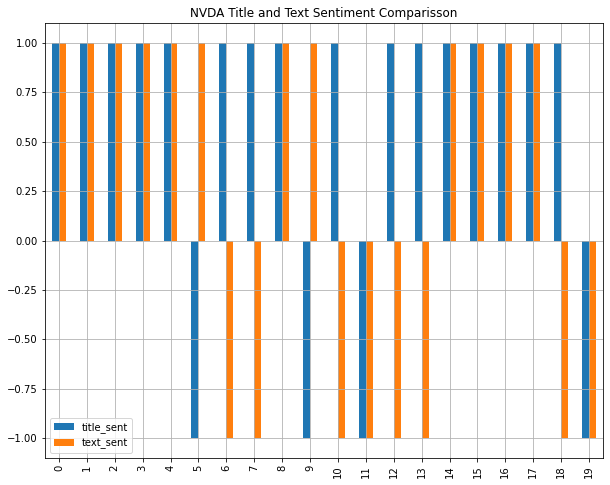

In [185]:
# Analyzing Sentiment Results via Plot
NVDA_sent_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="NVDA Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [186]:
NVDA_sent_df.describe()

,title_compound,title_pos,title_neg,title_sent,text_compound,text_pos,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.119845,0.138600,0.058100,0.600000,0.189980,0.137850,0.084900,0.200000
std,0.369871,0.136625,0.137571,0.820783,0.540232,0.062382,0.092706,1.005249
min,-0.718400,0.000000,0.000000,-1.000000,-0.526700,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,-0.421500,0.087000,0.000000,-1.000000
50%,0.101150,0.161500,0.000000,1.000000,0.401650,0.145000,0.049500,1.000000
75%,0.406800,0.258500,0.000000,1.000000,0.659150,0.180750,0.212000,1.000000
max,0.807400,0.326000,0.500000,1.000000,0.840200,0.227000,0.212000,1.000000


In [188]:
NVDA_Sentiment_df = NVDA_sent_df[["text", "text_sent"]] 
NVDA_Sentiment_df.head()

,text,text_sent
0,The crypto bull market remains in full throttl...,1
1,"Mairs &amp; Power, an investment management fi...",1
2,Nvidia (NVDA) - Get Report has been a bit of ...,1
3,You can only hate and love so much. The love f...,1
4,Nvidia Corp.s stock and the broader chip secto...,1


# Combine All Sentiments into One DataFrame for Model Building

In [189]:
Sentiments_df = pd.concat([NVDA_Sentiment_df, TWTR_Sentiment_df, AMZN_3_Sentiment_df, SQ_Sentiment_df, AMC_Sentiment_df,
                          CCIV_Sentiment_df, PLTR_Sentiment_df, AAPL_3_Sentiment_df, TSLA_3_Sentiment_df, GME_3_Sentiment_df,
                          BOX_Sentiment_df, PLUG_Sentiment_df, LIFE_Sentiment_df, TKAT_Sentiment_df, GME_2_Sentiment_df,
                          AMZN_2_Sentiment_df, UPST_Sentiment_df, FB_Sentiment_df, AAPL_2_Sentiment_df, TSLA_2_Sentiment_df,
                          TME_Sentiment_df, DISCA_Sentiment_df, NIO_Sentiment_df, AMZN_Sentiment_df, BIDU_Sentiment_df,
                          BA_Sentiment_df, VIAC_Sentiment_df, GME_Sentiment_df, AAPL_Sentiment_df, TSLA_Sentiment_df])

In [190]:
# Look at top 50
Sentiments_df.head(50)

,text,text_sent
0,The crypto bull market remains in full throttl...,1
1,"Mairs &amp; Power, an investment management fi...",1
2,Nvidia (NVDA) - Get Report has been a bit of ...,1
3,You can only hate and love so much. The love f...,1
4,Nvidia Corp.s stock and the broader chip secto...,1
5,As I teach my Millennial son some good investm...,1
6,Volatility in Nvidia (NVDA) has picked up in t...,-1
7,Reasonable investors can (and do) disagree abo...,-1
8,U.S. largest bank launches a crypto-related st...,1
9,"Contrary to what you may have heard, Republica...",1


In [191]:
# Write to CSV File
file_path = Path("Resources/Sentiments.csv")
Sentiments_df.to_csv(file_path)